# TIME SERIES ANALYSIS - ENERGY DEMAND

Teesside University MSc Applied Artificial Intelligence

Machine Learning ICA

Name: Eresia-eke Iyowuna David Ibe

Student Number: B1141865

Email: B1141865@tees.ac.uk

#  Data Capture and Initial Analysis
---------------------------------------------------------------------------

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
# Visuals.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
# Machine Learning
from statsmodels.tsa.stattools import adfuller, acf, grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose

#np.random.seed(3)

## Energy Demand Dataset

In [2]:
#import pandas to read the raw data csv file to a dataframe
preview_e = pd.read_csv("dataset.csv")

In [3]:
# To understand the number of rows and columns in the dataset
preview_e.shape


(45432, 17)

In [4]:
# Printing the first 5 rows of the dataset
preview_e.head()

,Unnamed: 0,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]
0,2017-01-01 00:00:00+01:00,76345.25,0.0,NaN,5756.44,597.50,10513.95,0.0,2.45,-3.80,102875.0,0.0,271.60,269.82,269.84,209.0,2.97
1,2017-01-01 01:00:00+01:00,75437.00,0.0,NaN,5756.44,597.50,10513.95,0.0,2.48,-3.46,102839.0,0.0,271.62,269.85,269.79,212.0,3.13
2,2017-01-01 02:00:00+01:00,73368.25,0.0,NaN,5756.44,635.25,10513.95,0.0,4.62,-5.48,102735.0,0.0,271.61,269.93,269.58,218.0,3.25
3,2017-01-01 03:00:00+01:00,72116.00,0.0,NaN,5756.44,628.50,10513.95,0.0,6.13,-6.91,102660.0,0.0,271.60,269.99,269.44,218.0,3.37
4,2017-01-01 04:00:00+01:00,68593.75,0.0,NaN,5756.44,608.50,10513.95,0.0,6.75,-7.50,102629.0,0.0,271.60,270.02,269.38,219.0,3.42


In [5]:
# Printing the last 5 rows of the dataset
preview_e.tail()

,Unnamed: 0,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]
45427,2022-03-08 19:00:00+01:00,69881.25,170.00,250.16,11244.01,4149.50,16116.79,15.56,56.09,-42.02,101826.0,272.42,278.71,277.30,276.89,175.0,5.08
45428,2022-03-08 20:00:00+01:00,67759.00,166.25,130.32,11244.01,5012.75,16116.79,0.44,55.01,-43.17,101896.0,0.00,278.01,276.74,276.17,172.0,4.90
45429,2022-03-08 21:00:00+01:00,64427.50,169.25,130.32,11244.01,5223.00,16116.79,0.44,47.87,-44.17,101954.0,0.00,277.60,276.40,275.72,173.0,4.80
45430,2022-03-08 22:00:00+01:00,63364.25,165.50,134.79,11244.01,5200.75,16116.79,0.44,43.63,-45.54,102006.0,0.00,277.25,276.11,275.32,179.0,4.68
45431,2022-03-08 23:00:00+01:00,63996.50,168.25,133.64,11244.01,5013.00,16116.79,0.44,40.18,-45.92,102044.0,0.00,276.92,275.77,274.99,182.0,4.57


In [6]:
# min, max count avg and percentile details of each column 
preview_e.describe()

,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]
count,45429.000000,45413.000000,45210.000000,45432.000000,45413.000000,45432.000000,45415.000000,45416.000000,45422.000000,45421.000000,45416.000000,45422.000000,45422.000000,45422.000000,45421.000000,45421.000000
mean,53521.014699,1286.331384,1278.808883,8255.743000,3614.698500,14319.562303,11.157362,55.270664,-31.497639,101754.855772,160.796661,284.324071,284.243751,283.262665,190.253429,5.615327
std,11809.492016,1782.730487,1761.346022,1616.991295,2708.395258,1850.099922,8.476197,25.879619,20.049324,796.112329,220.426850,6.849745,7.473270,7.857066,59.927779,2.156487
min,29415.000000,0.000000,0.000000,5756.440000,391.000000,10494.090000,0.000000,0.000000,-50.000000,97862.000000,0.000000,265.340000,265.250000,259.800000,50.000000,1.270000
25%,44478.000000,0.000000,0.000000,6864.480000,1583.750000,12256.000000,0.000000,34.760000,-47.380000,101346.000000,0.000000,279.120000,278.600000,277.060000,141.000000,4.070000
50%,51757.000000,175.500000,154.450000,7992.890000,2712.750000,15009.340000,14.750000,57.830000,-38.590000,101790.000000,26.525000,283.630000,283.385000,283.050000,193.000000,5.220000
75%,61726.000000,2262.500000,2332.147500,9595.960000,4923.250000,15985.940000,17.180000,76.960000,-21.360000,102219.000000,280.540000,289.010000,288.970000,288.990000,240.000000,6.720000
max,94587.250000,8511.750000,7900.170000,11244.010000,14475.750000,16116.790000,31.550000,99.940000,88.290000,104134.000000,916.430000,308.000000,310.320000,308.370000,325.000000,16.930000


In [7]:
# To understand the data types of the column data
preview_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    45432 non-null  object 
 1   demand [MW]                   45429 non-null  float64
 2   solar_actual [MW]             45413 non-null  float64
 3   solar_forecast [MW]           45210 non-null  float64
 4   solar_inferred_capacity [MW]  45432 non-null  float64
 5   wind_actual [MW]              45413 non-null  float64
 6   wind_inferred_capacity [MW]   45432 non-null  float64
 7   albedo [%]                    45415 non-null  float64
 8   cloud_cover [%]               45416 non-null  float64
 9   frozen_precipitation [%]      45422 non-null  float64
 10  pressure [Pa]                 45421 non-null  float64
 11  radiation [W/m2]              45416 non-null  float64
 12  air_tmp [Kelvin]              45422 non-null  float64
 13  g

In [8]:
# To view the columns in the dataset
preview_e.columns

Index(['Unnamed: 0', 'demand [MW]', 'solar_actual [MW]', 'solar_forecast [MW]',
       'solar_inferred_capacity [MW]', 'wind_actual [MW]',
       'wind_inferred_capacity [MW]', 'albedo [%]', 'cloud_cover [%]',
       'frozen_precipitation [%]', 'pressure [Pa]', 'radiation [W/m2]',
       'air_tmp [Kelvin]', 'ground_tmp [Kelvin]', 'apparent_tmp [Kelvin]',
       'wind_direction [angle]', 'wind_speed [m/s]'],
      dtype='object')

## Column 1: apparent_tmp [Kelvin]']

In [9]:
# Analysing apparent_tmp [Kelvin] Column
preview_e['apparent_tmp [Kelvin]'].describe()

count    45422.000000
mean       283.262665
std          7.857066
min        259.800000
25%        277.060000
50%        283.050000
75%        288.990000
max        308.370000
Name: apparent_tmp [Kelvin], dtype: float64

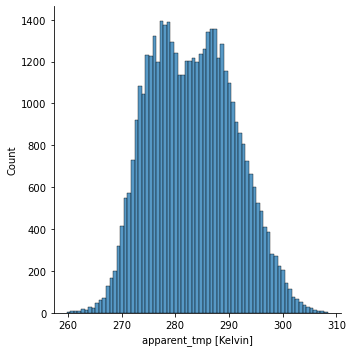

In [10]:
# visualising temp distribution 
sns.displot(preview_e, x="apparent_tmp [Kelvin]")

<AxesSubplot:>

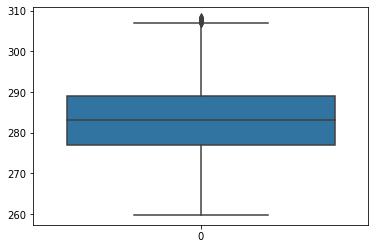

In [11]:
# boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e["apparent_tmp [Kelvin]"])

## Column 2: air_tmp [Kelvin]

In [12]:
# Analysing air_tmp [Kelvin] Column
preview_e['air_tmp [Kelvin]'].describe()

count    45422.000000
mean       284.324071
std          6.849745
min        265.340000
25%        279.120000
50%        283.630000
75%        289.010000
max        308.000000
Name: air_tmp [Kelvin], dtype: float64

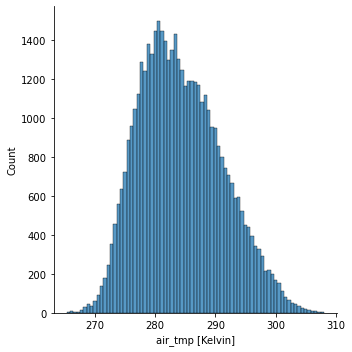

In [13]:
# visualising temp distribution 
sns.displot(preview_e, x="air_tmp [Kelvin]")

<AxesSubplot:>

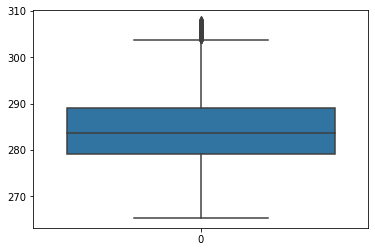

In [14]:
# boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e["air_tmp [Kelvin]"])

## Column 3 : solar_actual [MW]

In [15]:
# Analysing solar_actual [MW] Column
preview_e['solar_actual [MW]'].describe()

count    45413.000000
mean      1286.331384
std       1782.730487
min          0.000000
25%          0.000000
50%        175.500000
75%       2262.500000
max       8511.750000
Name: solar_actual [MW], dtype: float64

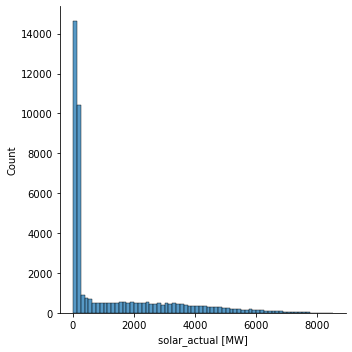

In [16]:
# visualising solar_actual [MW] distribution 
sns.displot(preview_e, x="solar_actual [MW]")

<AxesSubplot:>

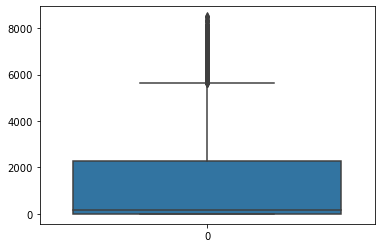

In [17]:
# boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e["solar_actual [MW]"])

## Column 4 : solar_forecast [MW]

In [18]:
# Analysing  solar_forecast [MW] Column
preview_e['solar_forecast [MW]'].describe()

count    45210.000000
mean      1278.808883
std       1761.346022
min          0.000000
25%          0.000000
50%        154.450000
75%       2332.147500
max       7900.170000
Name: solar_forecast [MW], dtype: float64

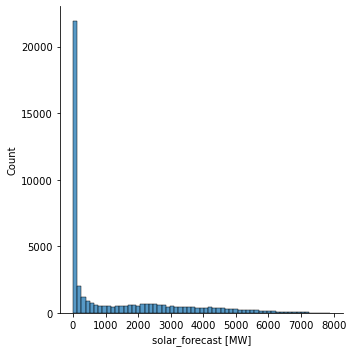

In [19]:
# visualising solar_actual [MW] distribution 
sns.displot(preview_e, x="solar_forecast [MW]")

<AxesSubplot:>

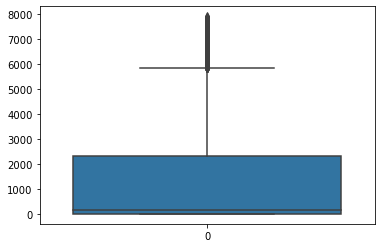

In [20]:
#boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e["solar_forecast [MW]"])

## Column 5 : solar_inferred_capacity [MW]

In [21]:
 # Analysing  solar_forecast [MW] [MW] Column
preview_e['solar_inferred_capacity [MW]'].describe() 

count    45432.000000
mean      8255.743000
std       1616.991295
min       5756.440000
25%       6864.480000
50%       7992.890000
75%       9595.960000
max      11244.010000
Name: solar_inferred_capacity [MW], dtype: float64

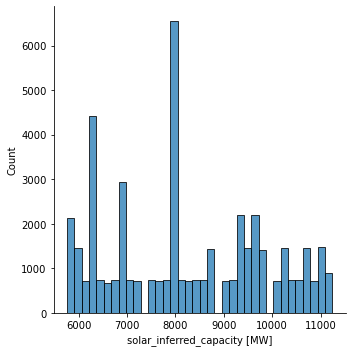

In [22]:
# visualising solar_inferred_capacity [MW]distribution 
sns.displot(preview_e, x="solar_inferred_capacity [MW]")

<AxesSubplot:>

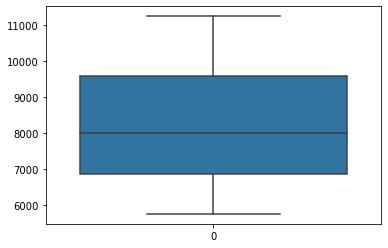

In [23]:
#boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e["solar_inferred_capacity [MW]"])

## Column 6 : wind_actual [MW]

In [24]:
 # Analysing  wind_actual [MW] Column
preview_e['wind_actual [MW]'].describe() 

count    45413.000000
mean      3614.698500
std       2708.395258
min        391.000000
25%       1583.750000
50%       2712.750000
75%       4923.250000
max      14475.750000
Name: wind_actual [MW], dtype: float64

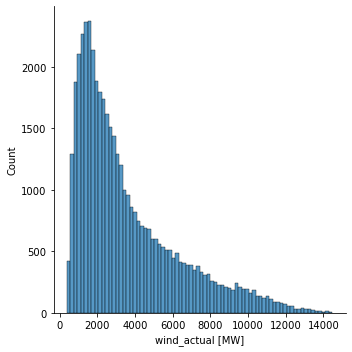

In [25]:
# visualising wind_actual [MW] distribution 
sns.displot(preview_e, x="wind_actual [MW]")

<AxesSubplot:>

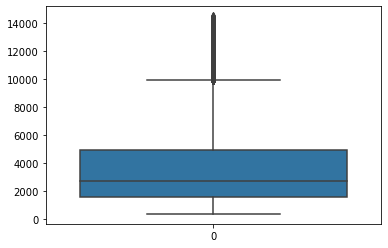

In [26]:
#boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e["wind_actual [MW]"])

## Column 7 : cloud_cover [%]

In [27]:
# Analysing  wind_actual [MW] Column
preview_e['cloud_cover [%]'].describe() 

count    45416.000000
mean        55.270664
std         25.879619
min          0.000000
25%         34.760000
50%         57.830000
75%         76.960000
max         99.940000
Name: cloud_cover [%], dtype: float64

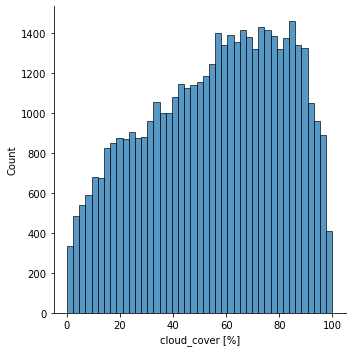

In [28]:
# visualising cloud_cover [%] distribution 
sns.displot(preview_e, x="cloud_cover [%]")

<AxesSubplot:>

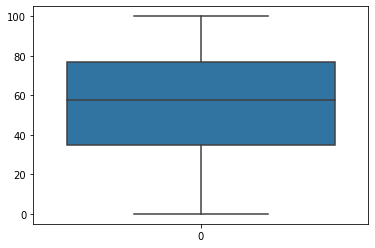

In [29]:
#boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e["cloud_cover [%]"])

## Column 8 : frozen_precipitation [%]

In [30]:
# Analysing  frozen_precipitation [%] Column
preview_e['frozen_precipitation [%]'].describe() 

count    45422.000000
mean       -31.497639
std         20.049324
min        -50.000000
25%        -47.380000
50%        -38.590000
75%        -21.360000
max         88.290000
Name: frozen_precipitation [%], dtype: float64

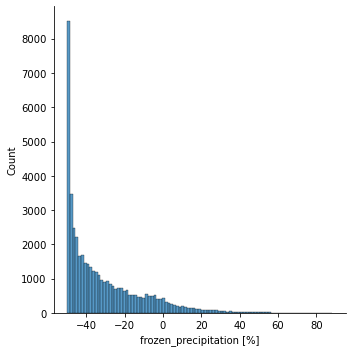

In [31]:
# visualising frozen_precipitation [%] distribution 
sns.displot(preview_e, x="frozen_precipitation [%]")

<AxesSubplot:>

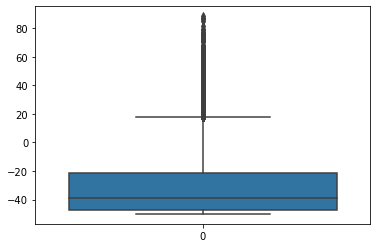

In [32]:
#boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e["frozen_precipitation [%]"])

## Column 9 : pressure [Pa]

In [33]:
# Analysing  pressure [Pa] Column
preview_e['pressure [Pa]'].describe() 

count     45421.000000
mean     101754.855772
std         796.112329
min       97862.000000
25%      101346.000000
50%      101790.000000
75%      102219.000000
max      104134.000000
Name: pressure [Pa], dtype: float64

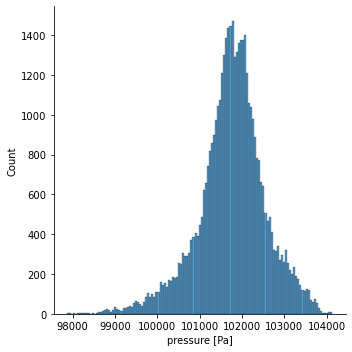

In [34]:
# visualising frozen_precipitation [%] distribution 
sns.displot(preview_e, x="pressure [Pa]")

<AxesSubplot:>

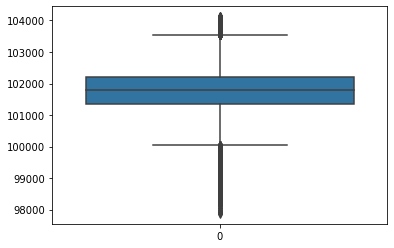

In [35]:
# boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e['pressure [Pa]'])

## Column 10 : radiation [W/m2]

In [36]:
# Analysing radiation [W/m2] Column
preview_e["radiation [W/m2]"].describe() 

count    45416.000000
mean       160.796661
std        220.426850
min          0.000000
25%          0.000000
50%         26.525000
75%        280.540000
max        916.430000
Name: radiation [W/m2], dtype: float64

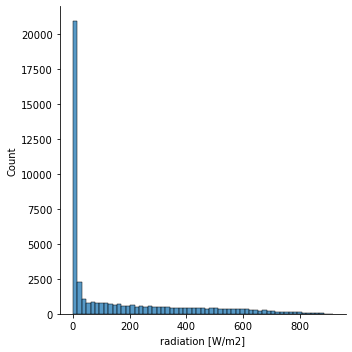

In [37]:
# visualising radiation [W/m2] distribution 
sns.displot(preview_e, x="radiation [W/m2]")

## Column 11 : wind_direction [angle]

In [38]:
# Analysing wind_direction [angle] Column
preview_e["wind_direction [angle]"].describe() 

count    45421.000000
mean       190.253429
std         59.927779
min         50.000000
25%        141.000000
50%        193.000000
75%        240.000000
max        325.000000
Name: wind_direction [angle], dtype: float64

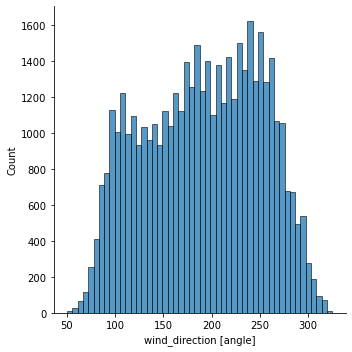

In [39]:
# visualising wind_direction [angle] distribution 
sns.displot(preview_e, x="wind_direction [angle]")

## Column 12 : wind_speed [m/s] 

In [40]:
# Analysing wind_direction [angle] Column
preview_e["wind_speed [m/s]"].describe() 

count    45421.000000
mean         5.615327
std          2.156487
min          1.270000
25%          4.070000
50%          5.220000
75%          6.720000
max         16.930000
Name: wind_speed [m/s], dtype: float64

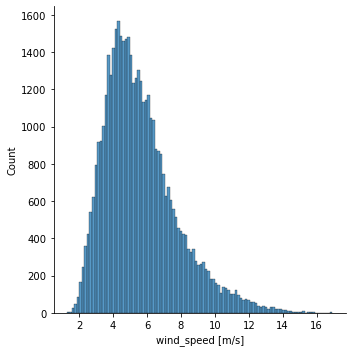

In [41]:
# visualising wind_direction [angle] distribution 
sns.displot(preview_e, x="wind_speed [m/s]")

<AxesSubplot:>

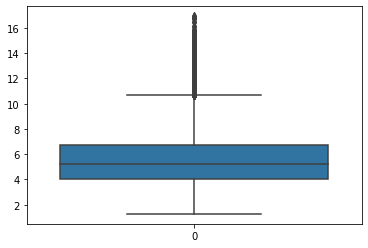

In [42]:
#boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e["wind_speed [m/s]"])

## Column 13 : Date and Time 

In [43]:
# Renaming Unamed column to Date
preview_e.rename(columns = {'Unnamed: 0':'date'}, inplace = True)

In [44]:
preview_e.head()

,date,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]
0,2017-01-01 00:00:00+01:00,76345.25,0.0,NaN,5756.44,597.50,10513.95,0.0,2.45,-3.80,102875.0,0.0,271.60,269.82,269.84,209.0,2.97
1,2017-01-01 01:00:00+01:00,75437.00,0.0,NaN,5756.44,597.50,10513.95,0.0,2.48,-3.46,102839.0,0.0,271.62,269.85,269.79,212.0,3.13
2,2017-01-01 02:00:00+01:00,73368.25,0.0,NaN,5756.44,635.25,10513.95,0.0,4.62,-5.48,102735.0,0.0,271.61,269.93,269.58,218.0,3.25
3,2017-01-01 03:00:00+01:00,72116.00,0.0,NaN,5756.44,628.50,10513.95,0.0,6.13,-6.91,102660.0,0.0,271.60,269.99,269.44,218.0,3.37
4,2017-01-01 04:00:00+01:00,68593.75,0.0,NaN,5756.44,608.50,10513.95,0.0,6.75,-7.50,102629.0,0.0,271.60,270.02,269.38,219.0,3.42


In [45]:
preview_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          45432 non-null  object 
 1   demand [MW]                   45429 non-null  float64
 2   solar_actual [MW]             45413 non-null  float64
 3   solar_forecast [MW]           45210 non-null  float64
 4   solar_inferred_capacity [MW]  45432 non-null  float64
 5   wind_actual [MW]              45413 non-null  float64
 6   wind_inferred_capacity [MW]   45432 non-null  float64
 7   albedo [%]                    45415 non-null  float64
 8   cloud_cover [%]               45416 non-null  float64
 9   frozen_precipitation [%]      45422 non-null  float64
 10  pressure [Pa]                 45421 non-null  float64
 11  radiation [W/m2]              45416 non-null  float64
 12  air_tmp [Kelvin]              45422 non-null  float64
 13  g

In [46]:
# min date recorded in the dataset
preview_e.date.min()

'2017-01-01 00:00:00+01:00'

In [47]:
#max date recorded in the dataset
preview_e.date.max()

'2022-03-08 23:00:00+01:00'

## Column 14 : demand [MW]

In [48]:
# Analysing demand [MW] Column
preview_e["demand [MW]"].describe() 

count    45429.000000
mean     53521.014699
std      11809.492016
min      29415.000000
25%      44478.000000
50%      51757.000000
75%      61726.000000
max      94587.250000
Name: demand [MW], dtype: float64

<AxesSubplot:>

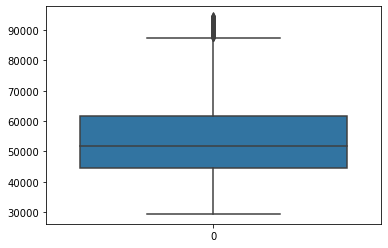

In [49]:
#boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e["demand [MW]"])

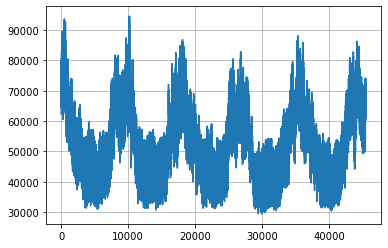

In [50]:
preview_e['demand [MW]'].plot(grid=True)
plt.show()

## Column 15 : albedo [%]

In [51]:
# Analysing albedo [%]] Column
preview_e["albedo [%]"].describe() 

count    45415.000000
mean        11.157362
std          8.476197
min          0.000000
25%          0.000000
50%         14.750000
75%         17.180000
max         31.550000
Name: albedo [%], dtype: float64

<AxesSubplot:>

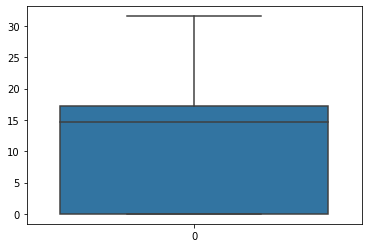

In [52]:
#boxplot for analysisng outliers if any 
sns.boxplot(data=preview_e["albedo [%]"])

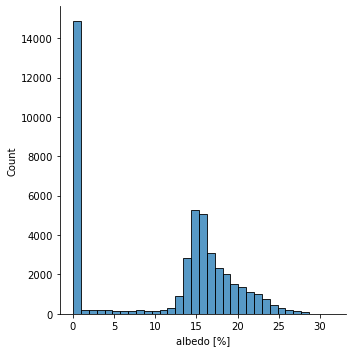

In [53]:
# visualising wind_direction [angle] distribution 
sns.displot(preview_e, x="albedo [%]")

## Column 16 : ground_tmp [Kelvin]

In [54]:
# Analysing albedo [%]] Column
preview_e["ground_tmp [Kelvin]"].describe() 

count    45422.000000
mean       284.243751
std          7.473270
min        265.250000
25%        278.600000
50%        283.385000
75%        288.970000
max        310.320000
Name: ground_tmp [Kelvin], dtype: float64

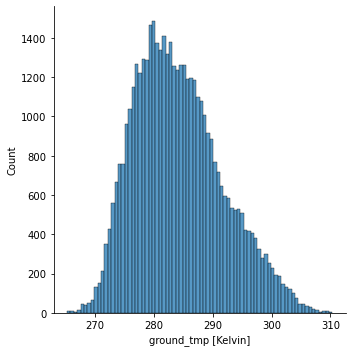

In [55]:
# visualising wind_direction [angle] distribution 
sns.displot(preview_e, x="ground_tmp [Kelvin]")

###  CONCLUSIONS FROM UNIVARIATE ANALYSIS:

##  Multivariate Analysis

## Analysing Columns against Date column

<AxesSubplot:xlabel='date'>

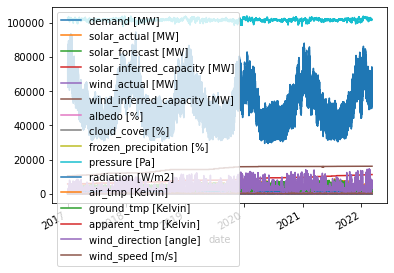

In [56]:
# plot showing date Vs other features in the traffic dataset
preview_e.set_index(pd.to_datetime(preview_e.date), drop=True).plot()

In [57]:
# Converting to Datetime
preview_e['date']= pd.to_datetime(preview_e['date'], utc=True)


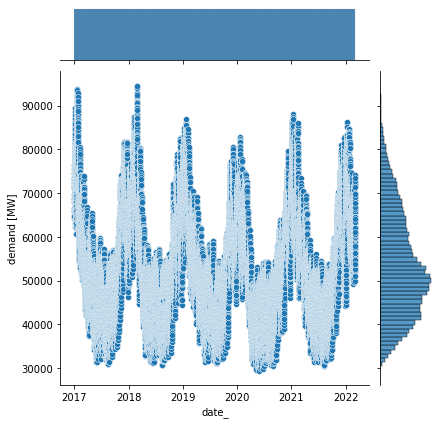

In [58]:
preview_e['date_']=preview_e['date'].dt.date

# Plotting 2d join plot between date and demand [MW]
sns.jointplot(data=preview_e, x="date_", y="demand [MW]")

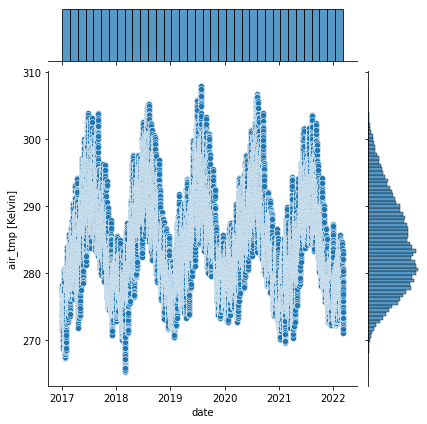

In [59]:
# Plotting 2d join plot between date and air_tmp [Kelvin]
sns.jointplot(data=preview_e, x="date", y="air_tmp [Kelvin]")

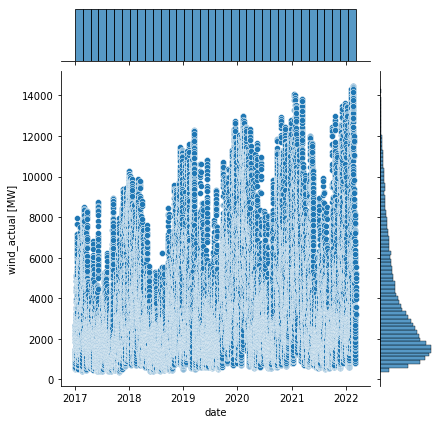

In [60]:
# Plotting 2d join plot between date and wind_actual [MW]
sns.jointplot(data=preview_e, x="date", y="wind_actual [MW]")

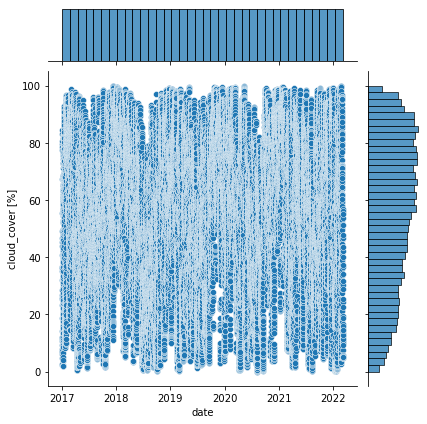

In [61]:
# Plotting 2d join plot between date and cloud_cover [%]
sns.jointplot(data=preview_e, x="date", y="cloud_cover [%]")

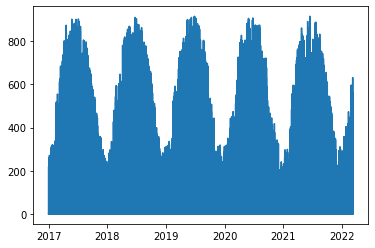

In [62]:
# Plotting relation between date and radiation [W/m2]
plt.plot(preview_e['date'],preview_e["radiation [W/m2]"])

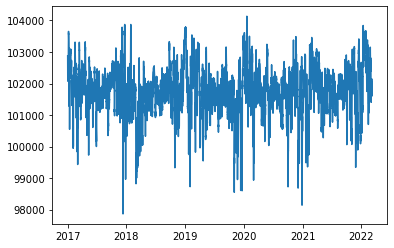

In [63]:
# Plotting relation between date and pressure [Pa]
plt.plot(preview_e['date'],preview_e["pressure [Pa]"])

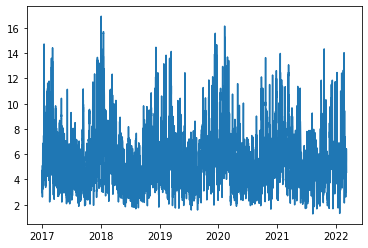

In [64]:
# Plotting relation between date and wind_speed [m/s]
plt.plot(preview_e['date'],preview_e["wind_speed [m/s]"])

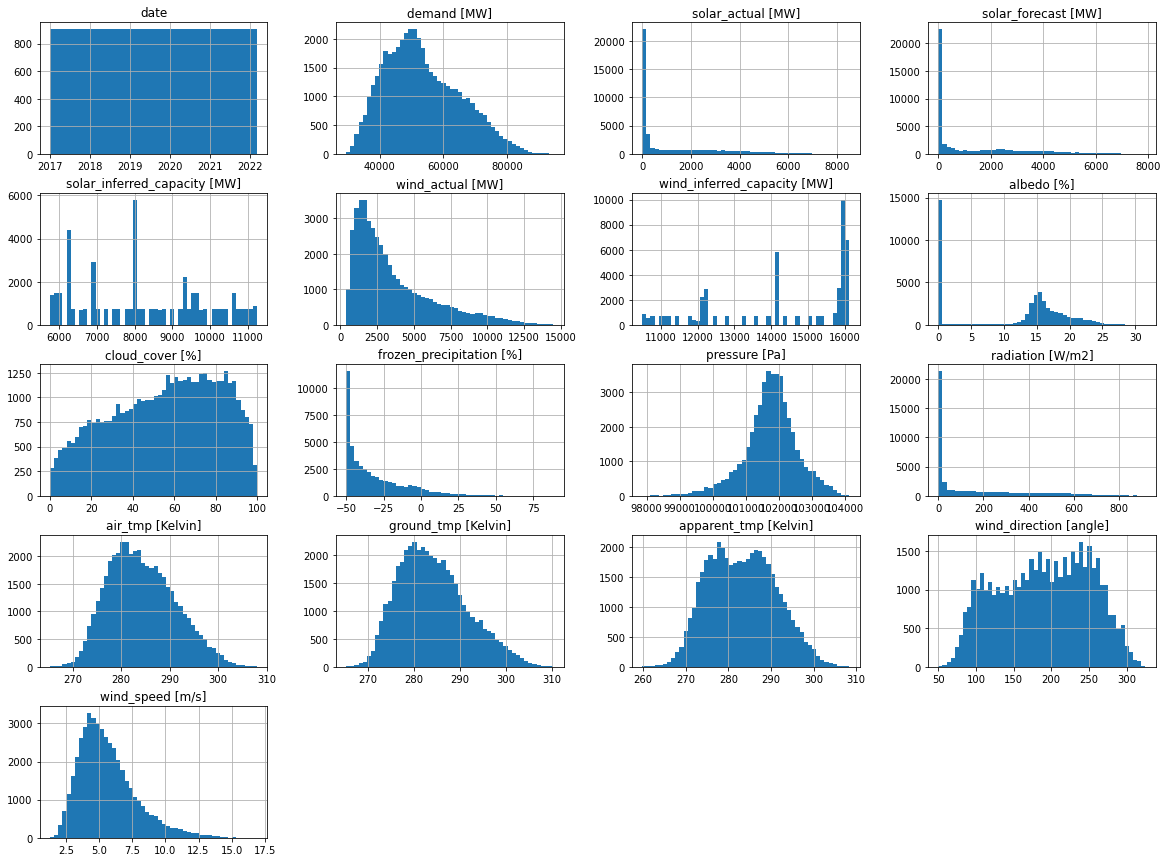

In [65]:
get_ipython().run_line_magic('matplotlib', 'inline')

preview_e.hist(bins=50, figsize=(20,15))
plt.show()

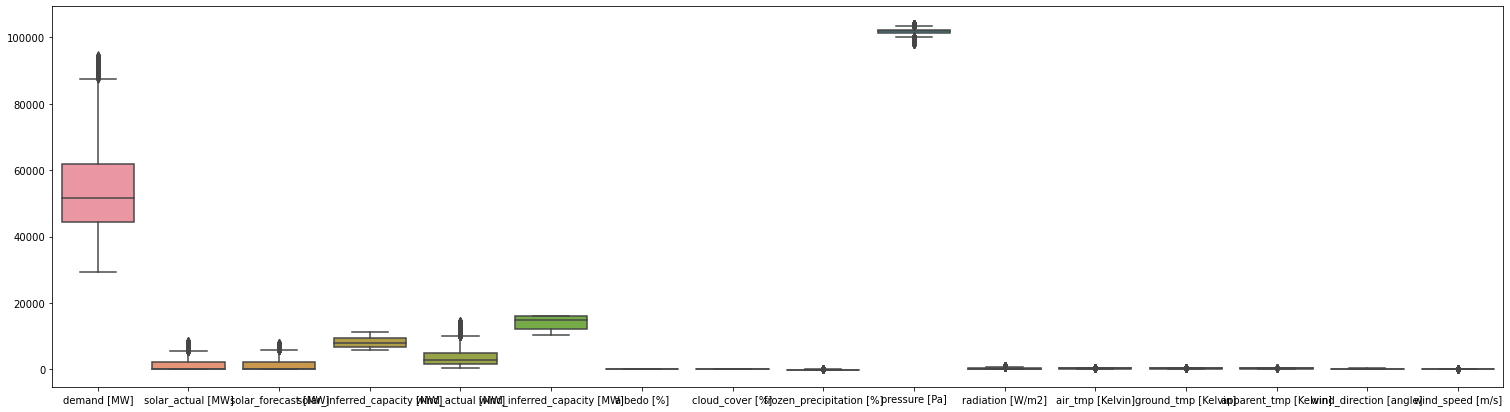

In [66]:
#box plot for all the columns to check outliers 
plt.figure(figsize=(26,7))
ax = sns.boxplot(data=preview_e)


In [67]:
#pit plot to identify the relation between columns if any
#sns.pairplot(preview_e)

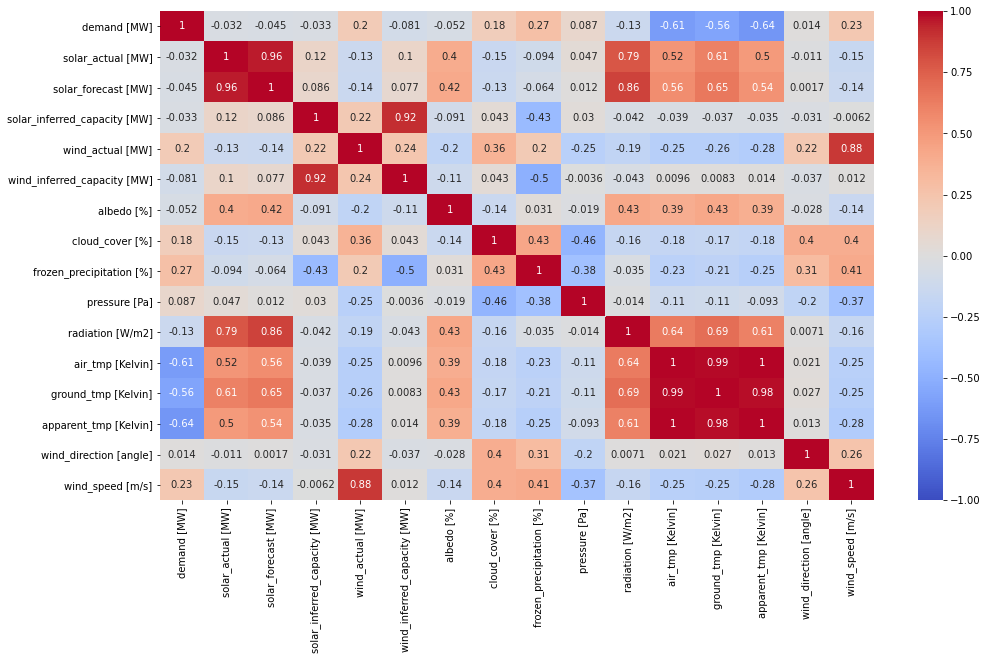

In [68]:
# plotting correlation 

#Using Pearson Correlation
correlation_matrix = preview_e.corr()
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()


### CONCLUSIONS FROM Multi-VARIATE ANALYSIS:

#  Data Pre-Processing
--------------------------------------------------------

In [69]:
#converting date to datetime64[ns] data type. 
preview_e['date_']= pd.to_datetime(preview_e['date_'])
preview_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   date                          45432 non-null  datetime64[ns, UTC]
 1   demand [MW]                   45429 non-null  float64            
 2   solar_actual [MW]             45413 non-null  float64            
 3   solar_forecast [MW]           45210 non-null  float64            
 4   solar_inferred_capacity [MW]  45432 non-null  float64            
 5   wind_actual [MW]              45413 non-null  float64            
 6   wind_inferred_capacity [MW]   45432 non-null  float64            
 7   albedo [%]                    45415 non-null  float64            
 8   cloud_cover [%]               45416 non-null  float64            
 9   frozen_precipitation [%]      45422 non-null  float64            
 10  pressure [Pa]                 4542

In [70]:
preview_e.head()

,date,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],date_
0,2016-12-31 23:00:00+00:00,76345.25,0.0,NaN,5756.44,597.50,10513.95,0.0,2.45,-3.80,102875.0,0.0,271.60,269.82,269.84,209.0,2.97,2016-12-31
1,2017-01-01 00:00:00+00:00,75437.00,0.0,NaN,5756.44,597.50,10513.95,0.0,2.48,-3.46,102839.0,0.0,271.62,269.85,269.79,212.0,3.13,2017-01-01
2,2017-01-01 01:00:00+00:00,73368.25,0.0,NaN,5756.44,635.25,10513.95,0.0,4.62,-5.48,102735.0,0.0,271.61,269.93,269.58,218.0,3.25,2017-01-01
3,2017-01-01 02:00:00+00:00,72116.00,0.0,NaN,5756.44,628.50,10513.95,0.0,6.13,-6.91,102660.0,0.0,271.60,269.99,269.44,218.0,3.37,2017-01-01
4,2017-01-01 03:00:00+00:00,68593.75,0.0,NaN,5756.44,608.50,10513.95,0.0,6.75,-7.50,102629.0,0.0,271.60,270.02,269.38,219.0,3.42,2017-01-01


###  Coverting temp values to celsuis

In [71]:
# converting Average temperature from Kelvin to Celsius

#preview_e['temp']= preview_e['temp']-273.15
#preview_e['temp'].describe()

## missing values

In [72]:
# To check the number of missing values in each column
preview_e.isna().sum()

date                              0
demand [MW]                       3
solar_actual [MW]                19
solar_forecast [MW]             222
solar_inferred_capacity [MW]      0
wind_actual [MW]                 19
wind_inferred_capacity [MW]       0
albedo [%]                       17
cloud_cover [%]                  16
frozen_precipitation [%]         10
pressure [Pa]                    11
radiation [W/m2]                 16
air_tmp [Kelvin]                 10
ground_tmp [Kelvin]              10
apparent_tmp [Kelvin]            10
wind_direction [angle]           11
wind_speed [m/s]                 11
date_                             0
dtype: int64

In [73]:
# making new data frame with dropped NA values
new_data = preview_e.dropna(axis = 0, how ='any')
	
new_data


,date,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],date_
192,2017-01-08 23:00:00+00:00,72921.75,0.00,0.55,5756.44,1151.00,10513.95,0.00,64.91,-1.06,103114.0,0.00,274.13,273.44,271.90,178.0,4.14,2017-01-08
193,2017-01-09 00:00:00+00:00,70956.00,0.00,0.55,5756.44,1103.75,10513.95,0.00,63.71,-0.96,103109.0,0.00,274.01,273.32,271.78,180.0,4.13,2017-01-09
194,2017-01-09 01:00:00+00:00,68422.50,0.00,0.55,5756.44,1111.00,10513.95,0.00,59.69,-0.48,103070.0,0.00,273.82,273.14,271.51,180.0,4.04,2017-01-09
195,2017-01-09 02:00:00+00:00,67520.50,0.00,0.06,5756.44,1165.00,10513.95,0.00,56.84,-0.14,103042.0,0.00,273.68,273.01,271.32,190.0,4.07,2017-01-09
196,2017-01-09 03:00:00+00:00,64729.25,0.00,0.06,5756.44,1210.75,10513.95,0.00,55.66,0.00,103031.0,0.00,273.63,272.96,271.24,190.0,4.10,2017-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45427,2022-03-08 18:00:00+00:00,69881.25,170.00,250.16,11244.01,4149.50,16116.79,15.56,56.09,-42.02,101826.0,272.42,278.71,277.30,276.89,175.0,5.08,2022-03-08
45428,2022-03-08 19:00:00+00:00,67759.00,166.25,130.32,11244.01,5012.75,16116.79,0.44,55.01,-43.17,101896.0,0.00,278.01,276.74,276.17,172.0,4.90,2022-03-08
45429,2022-03-08 20:00:00+00:00,64427.50,169.25,130.32,11244.01,5223.00,16116.79,0.44,47.87,-44.17,101954.0,0.00,277.60,276.40,275.72,173.0,4.80,2022-03-08
45430,2022-03-08 21:00:00+00:00,63364.25,165.50,134.79,11244.01,5200.75,16116.79,0.44,43.63,-45.54,102006.0,0.00,277.25,276.11,275.32,179.0,4.68,2022-03-08


### Now we compare sizes of data frames so that we can come to know how many rows had at least 1 Null value

In [74]:
# Now we compare sizes of data frames so that we can come to know how many rows had at least 1 Null value
print("Old data frame length:", len(preview_e))
print("New data frame length:", len(new_data))
print("Number of rows with at least 1 NA value: ",
	(len(preview_e)-len(new_data)))


Old data frame length: 45432
New data frame length: 45202
Number of rows with at least 1 NA value:  230


# Research Questions
-----------------------------------------------

##  What is being Analysed?

##  Why is it being Analysed?

## How is it being analysed?

### Suitable Algorithms - Regrerssion Analysis

###  Suitable Algorithms - TimeSeries Analysis

##  Identifying targets and variables for regression analysis:

##  Preparing Data for Regression Analysis
---------------------------------------------------------------------------

### Remove unused columns before encoding

In [75]:
#print all the column names 
new_data.columns

Index(['date', 'demand [MW]', 'solar_actual [MW]', 'solar_forecast [MW]',
       'solar_inferred_capacity [MW]', 'wind_actual [MW]',
       'wind_inferred_capacity [MW]', 'albedo [%]', 'cloud_cover [%]',
       'frozen_precipitation [%]', 'pressure [Pa]', 'radiation [W/m2]',
       'air_tmp [Kelvin]', 'ground_tmp [Kelvin]', 'apparent_tmp [Kelvin]',
       'wind_direction [angle]', 'wind_speed [m/s]', 'date_'],
      dtype='object')

In [76]:
# check the data type of the columns
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45202 entries, 192 to 45431
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   date                          45202 non-null  datetime64[ns, UTC]
 1   demand [MW]                   45202 non-null  float64            
 2   solar_actual [MW]             45202 non-null  float64            
 3   solar_forecast [MW]           45202 non-null  float64            
 4   solar_inferred_capacity [MW]  45202 non-null  float64            
 5   wind_actual [MW]              45202 non-null  float64            
 6   wind_inferred_capacity [MW]   45202 non-null  float64            
 7   albedo [%]                    45202 non-null  float64            
 8   cloud_cover [%]               45202 non-null  float64            
 9   frozen_precipitation [%]      45202 non-null  float64            
 10  pressure [Pa]                 45

In [77]:
# visualising top 5 rows od the dataframe 
new_data.head()

,date,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],date_
192,2017-01-08 23:00:00+00:00,72921.75,0.0,0.55,5756.44,1151.00,10513.95,0.0,64.91,-1.06,103114.0,0.0,274.13,273.44,271.90,178.0,4.14,2017-01-08
193,2017-01-09 00:00:00+00:00,70956.00,0.0,0.55,5756.44,1103.75,10513.95,0.0,63.71,-0.96,103109.0,0.0,274.01,273.32,271.78,180.0,4.13,2017-01-09
194,2017-01-09 01:00:00+00:00,68422.50,0.0,0.55,5756.44,1111.00,10513.95,0.0,59.69,-0.48,103070.0,0.0,273.82,273.14,271.51,180.0,4.04,2017-01-09
195,2017-01-09 02:00:00+00:00,67520.50,0.0,0.06,5756.44,1165.00,10513.95,0.0,56.84,-0.14,103042.0,0.0,273.68,273.01,271.32,190.0,4.07,2017-01-09
196,2017-01-09 03:00:00+00:00,64729.25,0.0,0.06,5756.44,1210.75,10513.95,0.0,55.66,0.00,103031.0,0.0,273.63,272.96,271.24,190.0,4.10,2017-01-09


In [78]:
# saving a copy of Energy Demand data to perform timeseries analysis 
new_data_ts = new_data

In [79]:
# Split date and time fields for deeper analysis

new_data['year'] = new_data['date_'].dt.year
new_data['month'] = new_data['date_'].dt.month
new_data['day'] = new_data['date_'].dt.day
new_data['weekday'] = new_data['date_'].dt.day_name()
new_data['date_time'] = new_data['date_'].dt.hour
new_data= new_data.rename(columns={"date_": "time"})

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45202 entries, 192 to 45431
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   date                          45202 non-null  datetime64[ns, UTC]
 1   demand [MW]                   45202 non-null  float64            
 2   solar_actual [MW]             45202 non-null  float64            
 3   solar_forecast [MW]           45202 non-null  float64            
 4   solar_inferred_capacity [MW]  45202 non-null  float64            
 5   wind_actual [MW]              45202 non-null  float64            
 6   wind_inferred_capacity [MW]   45202 non-null  float64            
 7   albedo [%]                    45202 non-null  float64            
 8   cloud_cover [%]               45202 non-null  float64            
 9   frozen_precipitation [%]      45202 non-null  float64            
 10  pressure [Pa]                 45

<ipython-input-79-3815aa2f9600>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['year'] = new_data['date_'].dt.year
<ipython-input-79-3815aa2f9600>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['month'] = new_data['date_'].dt.month
<ipython-input-79-3815aa2f9600>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [80]:
# visualising top 6 rows od the dataframe 
new_data.head()

,date,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],...,ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],time,year,month,day,weekday,date_time
192,2017-01-08 23:00:00+00:00,72921.75,0.0,0.55,5756.44,1151.00,10513.95,0.0,64.91,-1.06,...,273.44,271.90,178.0,4.14,2017-01-08,2017,1,8,Sunday,0
193,2017-01-09 00:00:00+00:00,70956.00,0.0,0.55,5756.44,1103.75,10513.95,0.0,63.71,-0.96,...,273.32,271.78,180.0,4.13,2017-01-09,2017,1,9,Monday,0
194,2017-01-09 01:00:00+00:00,68422.50,0.0,0.55,5756.44,1111.00,10513.95,0.0,59.69,-0.48,...,273.14,271.51,180.0,4.04,2017-01-09,2017,1,9,Monday,0
195,2017-01-09 02:00:00+00:00,67520.50,0.0,0.06,5756.44,1165.00,10513.95,0.0,56.84,-0.14,...,273.01,271.32,190.0,4.07,2017-01-09,2017,1,9,Monday,0
196,2017-01-09 03:00:00+00:00,64729.25,0.0,0.06,5756.44,1210.75,10513.95,0.0,55.66,0.00,...,272.96,271.24,190.0,4.10,2017-01-09,2017,1,9,Monday,0


In [81]:
# removing unused cols from taffic data frame,

cols = ['date','time','date']
new_data.drop(cols, axis=1, inplace=True)
new_data.head()

,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],...,air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],year,month,day,weekday,date_time
192,72921.75,0.0,0.55,5756.44,1151.00,10513.95,0.0,64.91,-1.06,103114.0,...,274.13,273.44,271.90,178.0,4.14,2017,1,8,Sunday,0
193,70956.00,0.0,0.55,5756.44,1103.75,10513.95,0.0,63.71,-0.96,103109.0,...,274.01,273.32,271.78,180.0,4.13,2017,1,9,Monday,0
194,68422.50,0.0,0.55,5756.44,1111.00,10513.95,0.0,59.69,-0.48,103070.0,...,273.82,273.14,271.51,180.0,4.04,2017,1,9,Monday,0
195,67520.50,0.0,0.06,5756.44,1165.00,10513.95,0.0,56.84,-0.14,103042.0,...,273.68,273.01,271.32,190.0,4.07,2017,1,9,Monday,0
196,64729.25,0.0,0.06,5756.44,1210.75,10513.95,0.0,55.66,0.00,103031.0,...,273.63,272.96,271.24,190.0,4.10,2017,1,9,Monday,0


In [82]:
def weekday_info(weekday):
    '''
    This approach encodes the weekdays with whole integers 
    and converts category days to numeric values.
    '''
    if weekday == 'Monday':
        return "1"
    elif weekday == 'Tuesday':
        return "2"
    elif weekday == 'Wednesday':
        return "3"
    elif weekday == 'Thursday':
        return "4"
    elif weekday == 'Friday':
        return "5"
    elif weekday == 'Saturday':
        return "6"
    else:
        return '0'

new_data['weekday'] = new_data['weekday'].apply(weekday_info)
new_data.head(10)

,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],...,air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],year,month,day,weekday,date_time
192,72921.75,0.00,0.55,5756.44,1151.00,10513.95,0.00,64.91,-1.06,103114.0,...,274.13,273.44,271.90,178.0,4.14,2017,1,8,0,0
193,70956.00,0.00,0.55,5756.44,1103.75,10513.95,0.00,63.71,-0.96,103109.0,...,274.01,273.32,271.78,180.0,4.13,2017,1,9,1,0
194,68422.50,0.00,0.55,5756.44,1111.00,10513.95,0.00,59.69,-0.48,103070.0,...,273.82,273.14,271.51,180.0,4.04,2017,1,9,1,0
195,67520.50,0.00,0.06,5756.44,1165.00,10513.95,0.00,56.84,-0.14,103042.0,...,273.68,273.01,271.32,190.0,4.07,2017,1,9,1,0
196,64729.25,0.00,0.06,5756.44,1210.75,10513.95,0.00,55.66,0.00,103031.0,...,273.63,272.96,271.24,190.0,4.10,2017,1,9,1,0
197,63864.50,0.00,0.06,5756.44,1185.25,10513.95,0.00,55.56,-0.29,103010.0,...,273.57,272.90,271.19,198.0,4.08,2017,1,9,1,0
198,66086.75,0.00,0.55,5756.44,1168.00,10513.95,0.00,55.36,-0.87,102967.0,...,273.45,272.77,271.09,209.0,4.12,2017,1,9,1,0
199,71651.00,0.00,0.55,5756.44,1241.00,10513.95,3.34,56.22,-0.89,102942.0,...,273.66,273.08,271.35,206.0,4.15,2017,1,9,1,0
200,78221.25,27.75,17.27,5756.44,1320.00,10513.95,11.41,58.53,-0.25,102931.0,...,274.34,273.98,272.12,213.0,4.10,2017,1,9,1,0
201,81002.00,108.25,105.75,5756.44,1389.50,10513.95,19.49,60.84,0.39,102920.0,...,275.00,274.88,272.89,220.0,4.14,2017,1,9,1,0


## Encoding data

In [83]:
#https://scikit-learn.org/stable/modules/preprocessing.html
#encoding-features

from sklearn.preprocessing import LabelEncoder

#Assigning the new_data dataset to a new variable process_data
process_data = new_data
process_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45202 entries, 192 to 45431
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   demand [MW]                   45202 non-null  float64
 1   solar_actual [MW]             45202 non-null  float64
 2   solar_forecast [MW]           45202 non-null  float64
 3   solar_inferred_capacity [MW]  45202 non-null  float64
 4   wind_actual [MW]              45202 non-null  float64
 5   wind_inferred_capacity [MW]   45202 non-null  float64
 6   albedo [%]                    45202 non-null  float64
 7   cloud_cover [%]               45202 non-null  float64
 8   frozen_precipitation [%]      45202 non-null  float64
 9   pressure [Pa]                 45202 non-null  float64
 10  radiation [W/m2]              45202 non-null  float64
 11  air_tmp [Kelvin]              45202 non-null  float64
 12  ground_tmp [Kelvin]           45202 non-null  float64
 13 

In [84]:
#scaling the data in dataset to normalise
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
process_data = pd.DataFrame(scaler.fit_transform(process_data), columns=process_data.columns)
process_data.head()

,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],...,air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],year,month,day,weekday,date_time
0,1.661492,-0.722664,-0.725794,-1.557135,-0.912398,-2.080709,-1.318214,0.369773,1.531549,1.718827,...,-1.500526,-1.456613,-1.458455,-0.204843,-0.684923,-1.418166,-1.536461,-0.877211,-1.499552,0.0
1,1.493961,-0.722664,-0.725794,-1.557135,-0.929831,-2.080709,-1.318214,0.323381,1.536558,1.712526,...,-1.518108,-1.472720,-1.473784,-0.171491,-0.689554,-1.418166,-1.536461,-0.763467,-0.999480,0.0
2,1.278043,-0.722664,-0.725794,-1.557135,-0.927156,-2.080709,-1.318214,0.167967,1.560602,1.663380,...,-1.545947,-1.496879,-1.508276,-0.171491,-0.731232,-1.418166,-1.536461,-0.763467,-0.999480,0.0
3,1.201170,-0.722664,-0.726072,-1.557135,-0.907233,-2.080709,-1.318214,0.057785,1.577633,1.628095,...,-1.566460,-1.514328,-1.532548,-0.004730,-0.717339,-1.418166,-1.536461,-0.763467,-0.999480,0.0
4,0.963285,-0.722664,-0.726072,-1.557135,-0.890354,-2.080709,-1.318214,0.012166,1.584646,1.614234,...,-1.573786,-1.521039,-1.542768,-0.004730,-0.703446,-1.418166,-1.536461,-0.763467,-0.999480,0.0


In [85]:
#Scaling the data because of huge diff between the scales of traffic volume and other features 

target = pd.DataFrame(process_data['demand [MW]'])
labels = pd.DataFrame(process_data.drop('demand [MW]', axis=1 ))

display(labels.head(),target.head())

,solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],year,month,day,weekday,date_time
0,-0.722664,-0.725794,-1.557135,-0.912398,-2.080709,-1.318214,0.369773,1.531549,1.718827,-0.73046,-1.500526,-1.456613,-1.458455,-0.204843,-0.684923,-1.418166,-1.536461,-0.877211,-1.499552,0.0
1,-0.722664,-0.725794,-1.557135,-0.929831,-2.080709,-1.318214,0.323381,1.536558,1.712526,-0.73046,-1.518108,-1.472720,-1.473784,-0.171491,-0.689554,-1.418166,-1.536461,-0.763467,-0.999480,0.0
2,-0.722664,-0.725794,-1.557135,-0.927156,-2.080709,-1.318214,0.167967,1.560602,1.663380,-0.73046,-1.545947,-1.496879,-1.508276,-0.171491,-0.731232,-1.418166,-1.536461,-0.763467,-0.999480,0.0
3,-0.722664,-0.726072,-1.557135,-0.907233,-2.080709,-1.318214,0.057785,1.577633,1.628095,-0.73046,-1.566460,-1.514328,-1.532548,-0.004730,-0.717339,-1.418166,-1.536461,-0.763467,-0.999480,0.0
4,-0.722664,-0.726072,-1.557135,-0.890354,-2.080709,-1.318214,0.012166,1.584646,1.614234,-0.73046,-1.573786,-1.521039,-1.542768,-0.004730,-0.703446,-1.418166,-1.536461,-0.763467,-0.999480,0.0


,demand [MW]
0,1.661492
1,1.493961
2,1.278043
3,1.201170
4,0.963285


In [86]:
# creating a dummy variable 
dummy_var = pd.get_dummies(labels)
dummy_var

,solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],year,month,day,weekday,date_time
0,-0.722664,-0.725794,-1.557135,-0.912398,-2.080709,-1.318214,0.369773,1.531549,1.718827,-0.730460,-1.500526,-1.456613,-1.458455,-0.204843,-0.684923,-1.418166,-1.536461,-0.877211,-1.499552,0.0
1,-0.722664,-0.725794,-1.557135,-0.929831,-2.080709,-1.318214,0.323381,1.536558,1.712526,-0.730460,-1.518108,-1.472720,-1.473784,-0.171491,-0.689554,-1.418166,-1.536461,-0.763467,-0.999480,0.0
2,-0.722664,-0.725794,-1.557135,-0.927156,-2.080709,-1.318214,0.167967,1.560602,1.663380,-0.730460,-1.545947,-1.496879,-1.508276,-0.171491,-0.731232,-1.418166,-1.536461,-0.763467,-0.999480,0.0
3,-0.722664,-0.726072,-1.557135,-0.907233,-2.080709,-1.318214,0.057785,1.577633,1.628095,-0.730460,-1.566460,-1.514328,-1.532548,-0.004730,-0.717339,-1.418166,-1.536461,-0.763467,-0.999480,0.0
4,-0.722664,-0.726072,-1.557135,-0.890354,-2.080709,-1.318214,0.012166,1.584646,1.614234,-0.730460,-1.573786,-1.521039,-1.542768,-0.004730,-0.703446,-1.418166,-1.536461,-0.763467,-0.999480,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45197,-0.627421,-0.584080,1.846476,0.193862,0.969265,0.520270,0.028790,-0.520205,0.095747,0.503796,-0.829459,-0.938524,-0.820996,-0.254871,-0.249618,1.932587,-0.964524,-0.877211,-0.499408,0.0
45198,-0.629522,-0.652118,1.846476,0.512348,0.969265,-1.266226,-0.012963,-0.577811,0.183958,-0.730460,-0.932024,-1.013687,-0.912974,-0.304900,-0.332974,1.932587,-0.964524,-0.877211,-0.499408,0.0
45199,-0.627842,-0.652118,1.846476,0.589917,0.969265,-1.266226,-0.288997,-0.627903,0.257047,-0.730460,-0.992098,-1.059322,-0.970460,-0.288224,-0.379283,1.932587,-0.964524,-0.877211,-0.499408,0.0
45200,-0.629943,-0.649581,1.846476,0.581708,0.969265,-1.266226,-0.452916,-0.696528,0.322575,-0.730460,-1.043380,-1.098245,-1.021559,-0.188167,-0.434854,1.932587,-0.964524,-0.877211,-0.499408,0.0


In [87]:
# printing the dummy varible and target to check columns and values 
display(dummy_var,target)

,solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],year,month,day,weekday,date_time
0,-0.722664,-0.725794,-1.557135,-0.912398,-2.080709,-1.318214,0.369773,1.531549,1.718827,-0.730460,-1.500526,-1.456613,-1.458455,-0.204843,-0.684923,-1.418166,-1.536461,-0.877211,-1.499552,0.0
1,-0.722664,-0.725794,-1.557135,-0.929831,-2.080709,-1.318214,0.323381,1.536558,1.712526,-0.730460,-1.518108,-1.472720,-1.473784,-0.171491,-0.689554,-1.418166,-1.536461,-0.763467,-0.999480,0.0
2,-0.722664,-0.725794,-1.557135,-0.927156,-2.080709,-1.318214,0.167967,1.560602,1.663380,-0.730460,-1.545947,-1.496879,-1.508276,-0.171491,-0.731232,-1.418166,-1.536461,-0.763467,-0.999480,0.0
3,-0.722664,-0.726072,-1.557135,-0.907233,-2.080709,-1.318214,0.057785,1.577633,1.628095,-0.730460,-1.566460,-1.514328,-1.532548,-0.004730,-0.717339,-1.418166,-1.536461,-0.763467,-0.999480,0.0
4,-0.722664,-0.726072,-1.557135,-0.890354,-2.080709,-1.318214,0.012166,1.584646,1.614234,-0.730460,-1.573786,-1.521039,-1.542768,-0.004730,-0.703446,-1.418166,-1.536461,-0.763467,-0.999480,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45197,-0.627421,-0.584080,1.846476,0.193862,0.969265,0.520270,0.028790,-0.520205,0.095747,0.503796,-0.829459,-0.938524,-0.820996,-0.254871,-0.249618,1.932587,-0.964524,-0.877211,-0.499408,0.0
45198,-0.629522,-0.652118,1.846476,0.512348,0.969265,-1.266226,-0.012963,-0.577811,0.183958,-0.730460,-0.932024,-1.013687,-0.912974,-0.304900,-0.332974,1.932587,-0.964524,-0.877211,-0.499408,0.0
45199,-0.627842,-0.652118,1.846476,0.589917,0.969265,-1.266226,-0.288997,-0.627903,0.257047,-0.730460,-0.992098,-1.059322,-0.970460,-0.288224,-0.379283,1.932587,-0.964524,-0.877211,-0.499408,0.0
45200,-0.629943,-0.649581,1.846476,0.581708,0.969265,-1.266226,-0.452916,-0.696528,0.322575,-0.730460,-1.043380,-1.098245,-1.021559,-0.188167,-0.434854,1.932587,-0.964524,-0.877211,-0.499408,0.0


,demand [MW]
0,1.661492
1,1.493961
2,1.278043
3,1.201170
4,0.963285
...,...
45197,1.402365
45198,1.221496
45199,0.937568
45200,0.846953


## PCA - Principal Component Analysis

In [88]:
# performing PCA on the dataset - simplifying the data dimentionality but retians the trend and patterns

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(labels)

data = pca.transform(labels)
data

array([[-2.78471225,  2.90469216, -2.10942872, ...,  0.22299709,
        -1.03870001,  0.64435663],
       [-2.78910591,  2.90562839, -2.14325658, ...,  0.21829444,
        -1.01771968,  0.60906081],
       [-2.79665642,  2.90472032, -2.20308567, ...,  0.23598449,
        -0.98910709,  0.45822987],
       ...,
       [-2.20293239, -2.9963833 , -0.45897433, ..., -0.14323728,
        -0.91133233, -0.45771111],
       [-2.21443235, -3.03441813, -0.57577993, ..., -0.20329663,
        -0.85894256, -0.5810874 ],
       [-2.22266904, -3.05007221, -0.69886001, ..., -0.21841557,
        -0.81541014, -0.68695632]])

In [89]:
# view shape of the features and labels
display(data.shape,labels.shape)

(45202, 11)

(45202, 20)

In [90]:
from sklearn import model_selection

#split data as training and testing set 80% and 20% respectively
from sklearn.model_selection import train_test_split

ft_train, ft_test, lb_train, lb_test = train_test_split(data , target, test_size=0.20, random_state = 2)
display(ft_train.shape,ft_test.shape)

(36161, 11)

(9041, 11)

#  Applying Machine Learning Algorithms

##  Multiple Linear Regression

###  MLR with SKlearn 

In [91]:
from sklearn import linear_model


X = ft_train
Y = lb_train
x = ft_test
y = lb_test


# with sklearn getting multiple linear regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept:', regr.intercept_)
print('\nCoefficients:', regr.coef_)

# prediction with sklearn
lb_pred = regr.predict(x)
print ('\n Predicted : ', lb_pred)

Intercept: [0.00094522]

Coefficients: [[-0.18155873  0.01764568  0.04553938  0.39974097 -0.05768068  0.04373949
  -0.05093017 -0.11469166  0.2545215   0.27969645  0.09930878]]

 Predicted :  [[ 1.07324433]
 [-0.09303835]
 [-0.87059143]
 ...
 [ 0.08873127]
 [ 0.08924766]
 [-0.98638567]]


In [92]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt


#predicted output values for test inputs
pred = lb_pred
# output values from the test set 
test = lb_test

print('Multiple Linear Regression')
print('------------------------------')

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)

Multiple Linear Regression
------------------------------
MAE : 0.54
MSE : 0.45
RMSE  : 0.667367
R2_SCORE  : 0.557940


### MLR with stats Model

In [93]:
# with statsmodels
import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            demand [MW]   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     3895.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        22:18:38   Log-Likelihood:                -37141.
No. Observations:               36161   AIC:                         7.431e+04
Df Residuals:                   36149   BIC:                         7.441e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.004      0.266      0.7

##  Support Vector Regressor

In [94]:
import numpy as np
np.random.seed(seed=5)

import warnings
warnings.simplefilter("ignore", UserWarning)

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline


# Train the model using the training sets for c=10 and e=0.4
regr = SVR(C=10, epsilon=0.4)
regr.fit(ft_train, lb_train)

# Make predictions using the testing set
lb_pred = regr.predict(ft_test)

In [95]:
#predicted output values for test inputs
pred = lb_pred
# output values from the test set 
test = lb_test

print('Support Vector Regressor')
print('------------------------------')

print('Accuracy : {}'.format(regr.score(ft_test, lb_test)))

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)

Support Vector Regressor
------------------------------
Accuracy : 0.9021214271293617
MAE : 0.25
MSE : 0.1
RMSE  : 0.314027
R2_SCORE  : 0.902121


##  KNN Regressor

In [96]:
from sklearn.neighbors import KNeighborsRegressor

# checking the accuracy while looping through the neighbors count from 1 to 9
for n in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(ft_train, lb_train)
    lb_pred = knn.predict(ft_test)
    print('KNeighborsRegressor: n = {} , Accuracy is: {}'.format(n,knn.score(ft_test, lb_test)))

KNeighborsRegressor: n = 1 , Accuracy is: 0.9330912296321977
KNeighborsRegressor: n = 2 , Accuracy is: 0.9368616346234755
KNeighborsRegressor: n = 3 , Accuracy is: 0.9282242321250205
KNeighborsRegressor: n = 4 , Accuracy is: 0.9191727791237678
KNeighborsRegressor: n = 5 , Accuracy is: 0.9106532757284097
KNeighborsRegressor: n = 6 , Accuracy is: 0.9023029954702092
KNeighborsRegressor: n = 7 , Accuracy is: 0.8950332665738461
KNeighborsRegressor: n = 8 , Accuracy is: 0.8884318350134284
KNeighborsRegressor: n = 9 , Accuracy is: 0.8833946271672667


In [97]:
#predicted output values for test inputs
pred = lb_pred
# output values from the test set 
test = lb_test

print('KNeighborsRegressor')
print('------------------------------')
# initialising the regressor for n=2 
knn = KNeighborsRegressor(n_neighbors = 2)

# applying the model for the test values
knn.fit(ft_train, lb_train)

# predicting the out put values for test inputs 
lb_pred = knn.predict(ft_test)

print('Accuracy : {}'.format(knn.score(ft_test, lb_test)))

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)#predicted output values for test inputs
pred = lb_pred
# output values from the test set 
test = lb_test

print('KNeighborsRegressor')
print('------------------------------')
# initialising the regressor for n=2 
knn = KNeighborsRegressor(n_neighbors = 2)

# applying the model for the test values
knn.fit(ft_train, lb_train)

# predicting the out put values for test inputs 
lb_pred = knn.predict(ft_test)

print('Accuracy : {}'.format(knn.score(ft_test, lb_test)))

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)

KNeighborsRegressor
------------------------------
Accuracy : 0.9368616346234755
MAE : 0.27
MSE : 0.12
RMSE  : 0.342754
R2_SCORE  : 0.883395
KNeighborsRegressor
------------------------------
Accuracy : 0.9368616346234755
MAE : 0.18
MSE : 0.06
RMSE  : 0.252215
R2_SCORE  : 0.936862


##  MLP Regressor ( Multi Layer Perceptron Model)

In [98]:
import numpy as np
s=3;
np.random.seed(seed=s)

from sklearn.neural_network import MLPRegressor
from sklearn import metrics

# creating mlp regressor model from sklearn
model = MLPRegressor()

#Training the model with test data
model.fit(ft_train, lb_train)
 
#predicting the output for test inputs
lb_pred = model.predict(ft_test)

In [99]:
#predicted output values for test inputs
pred = lb_pred
# output values from the test set 
test = lb_test

print('Multi Layer Perceptron Model')
print('------------------------------')

print('Accuracy : {}'.format(metrics.r2_score(test, pred)))

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)

Multi Layer Perceptron Model
------------------------------
Accuracy : 0.897587747928458
MAE : 0.25
MSE : 0.1
RMSE  : 0.321218
R2_SCORE  : 0.897588


NumPy random seed is a function that sets the NumPy pseudo-random number generator's random seed. 

It is required as an input for NumPy to generate pseudo-random integers for random processes.

#  Time-Series Analysis

##  Data preparation

In [100]:
# fetching the originally pre processed data before performing regression analysis. 
new_data_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45202 entries, 192 to 45431
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   date                          45202 non-null  datetime64[ns, UTC]
 1   demand [MW]                   45202 non-null  float64            
 2   solar_actual [MW]             45202 non-null  float64            
 3   solar_forecast [MW]           45202 non-null  float64            
 4   solar_inferred_capacity [MW]  45202 non-null  float64            
 5   wind_actual [MW]              45202 non-null  float64            
 6   wind_inferred_capacity [MW]   45202 non-null  float64            
 7   albedo [%]                    45202 non-null  float64            
 8   cloud_cover [%]               45202 non-null  float64            
 9   frozen_precipitation [%]      45202 non-null  float64            
 10  pressure [Pa]                 45

In [101]:
new_data_ts.head()

,date,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],...,ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],date_,year,month,day,weekday,date_time
192,2017-01-08 23:00:00+00:00,72921.75,0.0,0.55,5756.44,1151.00,10513.95,0.0,64.91,-1.06,...,273.44,271.90,178.0,4.14,2017-01-08,2017,1,8,Sunday,0
193,2017-01-09 00:00:00+00:00,70956.00,0.0,0.55,5756.44,1103.75,10513.95,0.0,63.71,-0.96,...,273.32,271.78,180.0,4.13,2017-01-09,2017,1,9,Monday,0
194,2017-01-09 01:00:00+00:00,68422.50,0.0,0.55,5756.44,1111.00,10513.95,0.0,59.69,-0.48,...,273.14,271.51,180.0,4.04,2017-01-09,2017,1,9,Monday,0
195,2017-01-09 02:00:00+00:00,67520.50,0.0,0.06,5756.44,1165.00,10513.95,0.0,56.84,-0.14,...,273.01,271.32,190.0,4.07,2017-01-09,2017,1,9,Monday,0
196,2017-01-09 03:00:00+00:00,64729.25,0.0,0.06,5756.44,1210.75,10513.95,0.0,55.66,0.00,...,272.96,271.24,190.0,4.10,2017-01-09,2017,1,9,Monday,0


In [102]:
# getting list of columns from new_data_ts
new_data_ts.columns

Index(['date', 'demand [MW]', 'solar_actual [MW]', 'solar_forecast [MW]',
       'solar_inferred_capacity [MW]', 'wind_actual [MW]',
       'wind_inferred_capacity [MW]', 'albedo [%]', 'cloud_cover [%]',
       'frozen_precipitation [%]', 'pressure [Pa]', 'radiation [W/m2]',
       'air_tmp [Kelvin]', 'ground_tmp [Kelvin]', 'apparent_tmp [Kelvin]',
       'wind_direction [angle]', 'wind_speed [m/s]', 'date_', 'year', 'month',
       'day', 'weekday', 'date_time'],
      dtype='object')

In [103]:
# performing univariate time series analysis so keep date_time , traffic_volume column and remove other data
cols = ["date", 'solar_actual [MW]', 'solar_forecast [MW]', 'solar_inferred_capacity [MW]', 'wind_actual [MW]', 'wind_inferred_capacity [MW]',
       'albedo [%]','cloud_cover [%]','frozen_precipitation [%]','pressure [Pa]','radiation [W/m2]','air_tmp [Kelvin]',"ground_tmp [Kelvin]","apparent_tmp [Kelvin]",'wind_direction [angle]','wind_speed [m/s]','year','month','day','weekday','date_time']
new_data_ts.drop(cols, axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [104]:
new_data_ts.head()

,demand [MW],date_
192,72921.75,2017-01-08
193,70956.00,2017-01-09
194,68422.50,2017-01-09
195,67520.50,2017-01-09
196,64729.25,2017-01-09


In [105]:
# data is recorded per hour, so we group data by data 
new_data_ts = new_data_ts.groupby('date_')['demand [MW]'].mean().reset_index()
new_data_ts.head()

,date_,demand [MW]
0,2017-01-08,72921.750000
1,2017-01-09,75206.875000
2,2017-01-10,74969.802083
3,2017-01-11,73123.010417
4,2017-01-12,71852.322917


In [106]:
new_data_ts['demand [MW]'] = new_data_ts['demand [MW]'].astype(int)

In [107]:
# setting date as index to create univariate dataset
timeSeries= new_data_ts.set_index(['date_'])
timeSeries.index

DatetimeIndex(['2017-01-08', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-14', '2017-01-15',
               '2017-01-16', '2017-01-17',
               ...
               '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06',
               '2022-03-07', '2022-03-08'],
              dtype='datetime64[ns]', name='date_', length=1886, freq=None)

In [108]:
timeSeries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1886 entries, 2017-01-08 to 2022-03-08
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   demand [MW]  1886 non-null   int32
dtypes: int32(1)
memory usage: 22.1 KB


In [109]:
# creating a timeseries object by resampling by monthly average. 

# getting values of monthly by calculating average
timeSeries = timeSeries['demand [MW]'].resample('MS').mean()

timeSeries.head()


date_
2017-01-01    76451.875000
2017-02-01    64459.821429
2017-03-01    56607.774194
2017-04-01    50537.400000
2017-05-01    46589.225806
Freq: MS, Name: demand [MW], dtype: float64

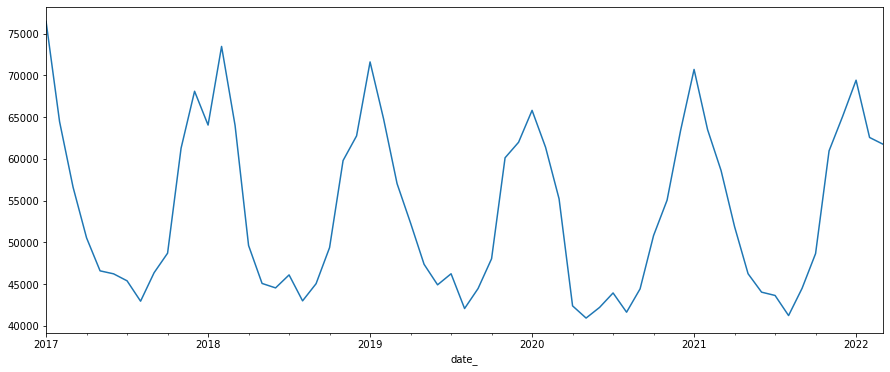

In [110]:
#plotting the timeseries object
timeSeries.plot(figsize=(15, 6))
plt.show()

<AxesSubplot:xlabel='date_'>

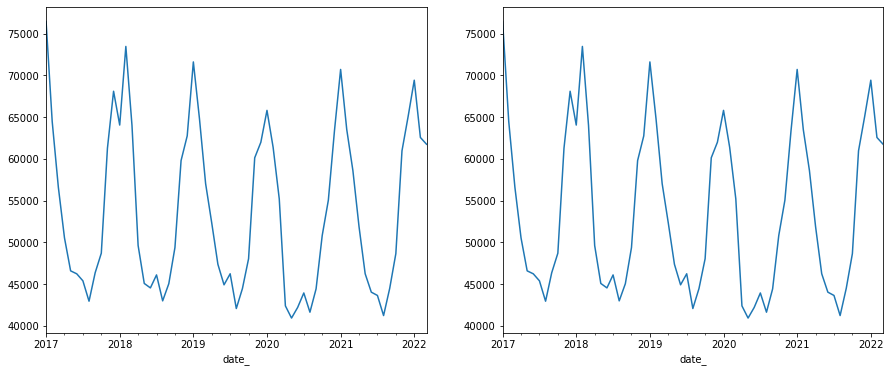

In [111]:
# analysing the time series by filling missing values (if any) by mean using ffill and interpolate methods

#timeSeries_filled= timeSeries.ffill()
#timeSeries_filled= timeSeries.interpolate(limit=2, limit_direction="forward");


timeSeries_filled = timeSeries.interpolate();

fig, axs = plt.subplots(1,2, figsize=(15, 6))

timeSeries.plot(ax=axs[0])
timeSeries_filled.plot(ax=axs[1])

###  Moving Average Analysis

A moving average is a collection of averages derived from historical data.

Any number of time periods can be used to calculate moving averages.

In [112]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculate average of last n observations
def moving_average(series, n):
    return np.average(series[-n:])

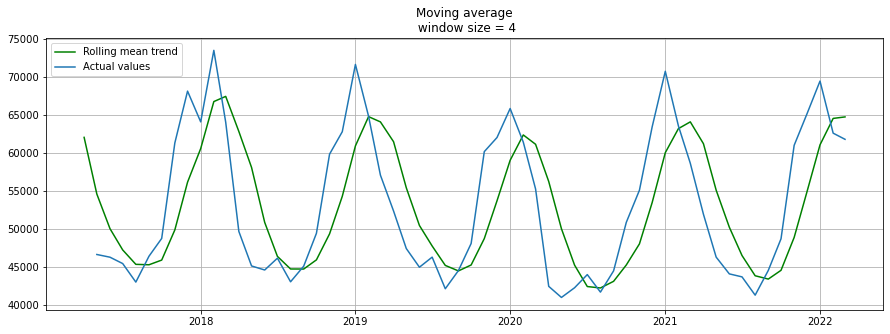

In [113]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(series[series.name])
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    

# Plotting the timeseries plot
plotMovingAverage(timeSeries, 4)

In [114]:
# Plotting the timeseries plot for missing and filled data
#plotMovingAverage(timeSeries_filled, 4)

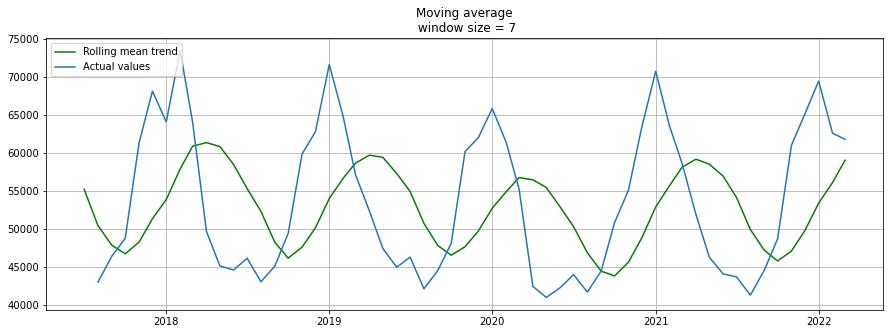

In [115]:
plotMovingAverage(timeSeries, 7) # weekly smoothing

In [116]:
#plotMovingAverage(timeSeries_filled, 7) # weekly smoothing

### Weighted Average Analysis

A weighted average is a calculation that considers the relative value of the values in a data collection. 

Each number in the data set is multiplied by a predefined weight before the final computation is completed when calculating a weighted average.

In [117]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [118]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [119]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

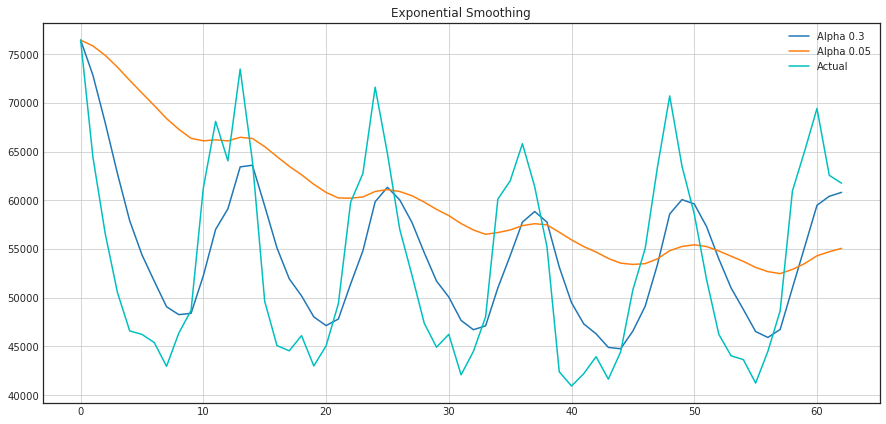

In [120]:
plotExponentialSmoothing(timeSeries.astype(int), [0.3, 0.05])

### Eponential Smooting

Exponentially smoothed forecasts are weighted averages of previous observations, with the weights decaying exponentially as the observations get older. 

In other words, the larger the related weight, the more recent the observation.

In [121]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

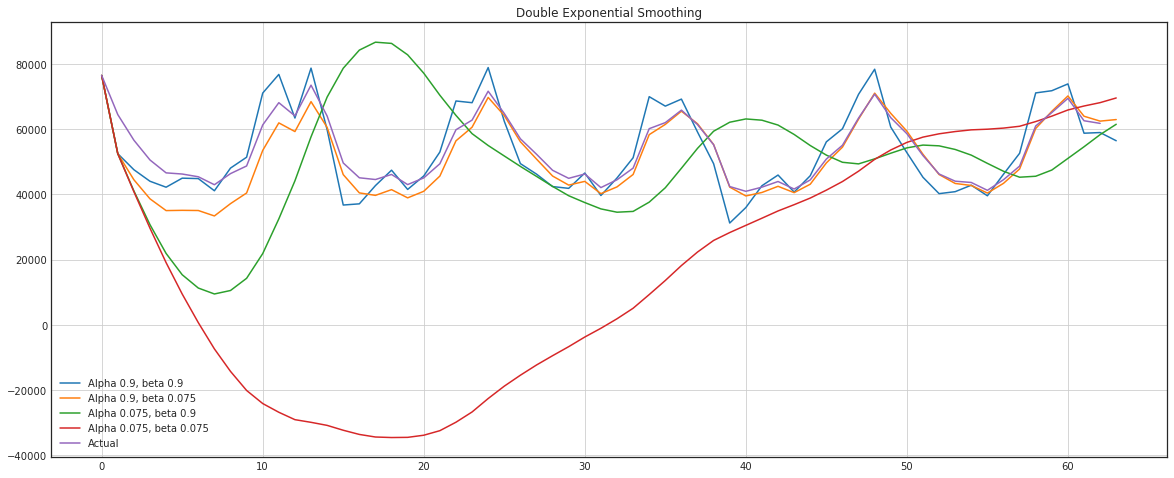

In [122]:
plotDoubleExponentialSmoothing(timeSeries.astype(int), alphas=[0.9, 0.075], betas=[0.9, 0.075])

### Time Series - Decomposition

Because time series data can display a wide range of patterns, it's often useful to break it down into numerous components, each reflecting a different pattern category.

We commonly combine the trend and cycle into a single trend-cycle component when decomposing a time series into components (sometimes called the trend for simplicity).

As a result, we consider a time series to have three parts: a trend-cycle component, a seasonal component, and a remainder component (containing anything else in the time series).

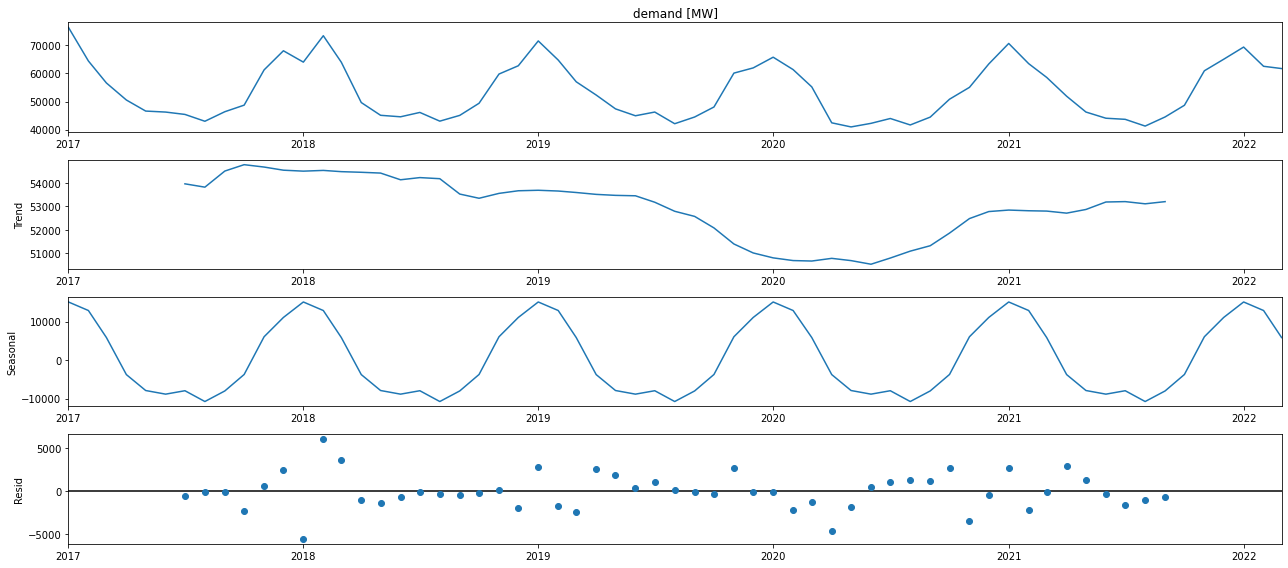

In [123]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(timeSeries, model='additive')

fig = decomposition.plot()
plt.show()

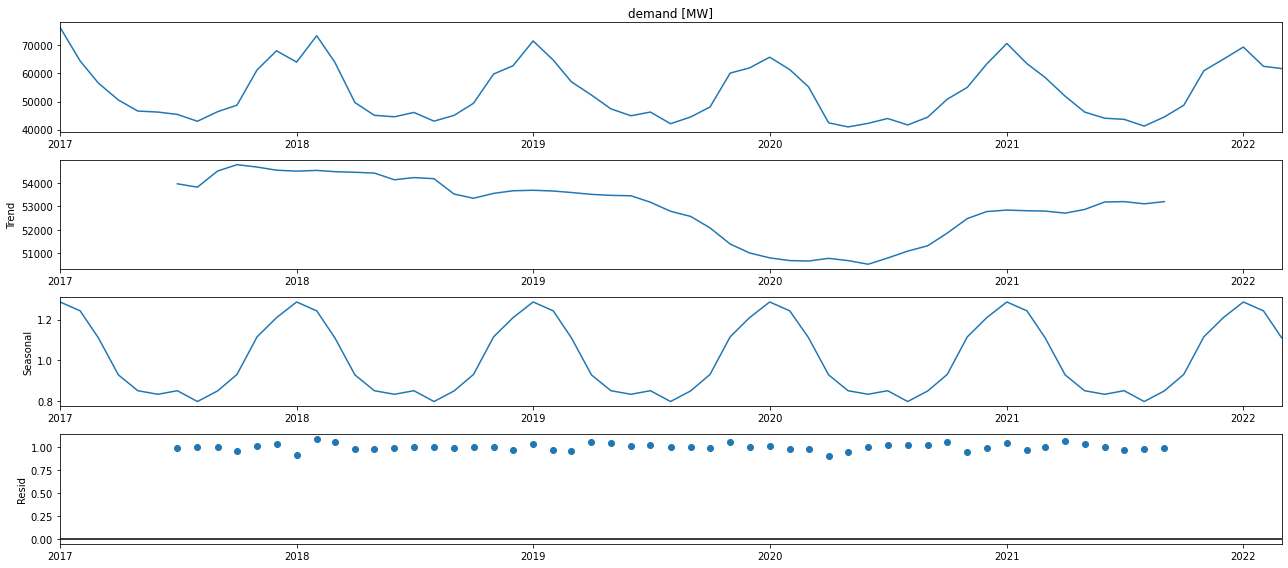

In [124]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(timeSeries, model='multiplicative')


fig = decomposition.plot()
plt.show()

### Stats Model 

Stats model is a Python module that includes classes and functions for estimating a variety of statistical models,

executing statistical tests, and exploring statistical data.

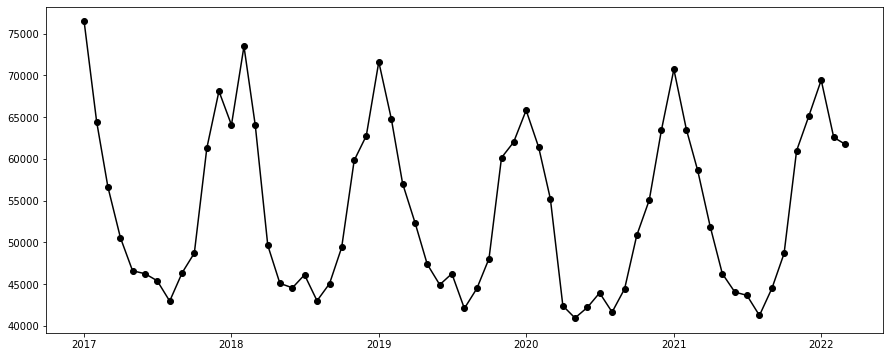

In [125]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

fit1 = SimpleExpSmoothing(timeSeries, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(timeSeries, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')

plt.figure(figsize=(15, 6))

#plt.plot(timeSeries, marker='o', color='orange')
plt.plot(timeSeries, marker='o', color='black')

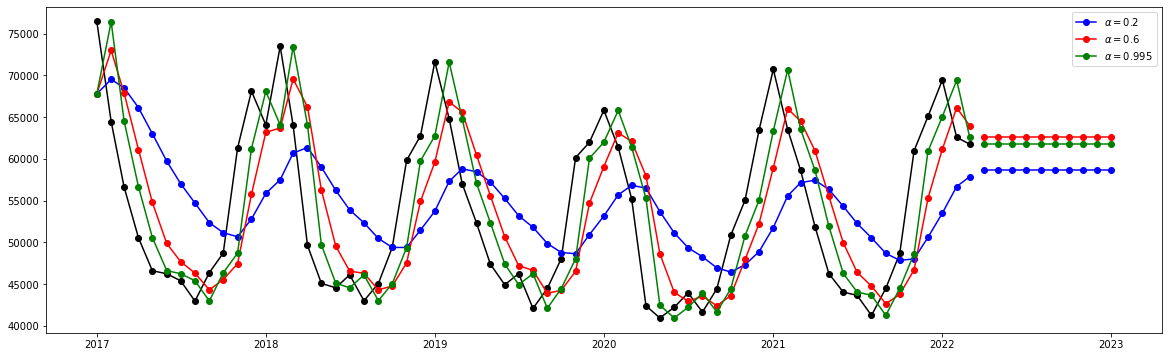

In [126]:
fit1 = SimpleExpSmoothing(timeSeries, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(10).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(timeSeries, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(10).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(timeSeries, initialization_method="estimated").fit()
fcast3 = fit3.forecast(10).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(20, 6))
plt.plot(timeSeries, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

##   Unsupervised

###  Holt-Winters Forecast 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Unsupervised - without missing values 
Holt-Winters
----------------
MAE : 7556.53
MSE : 102168691.71
RMSE  : 10107.852972
R2_SCORE  : -0.077558


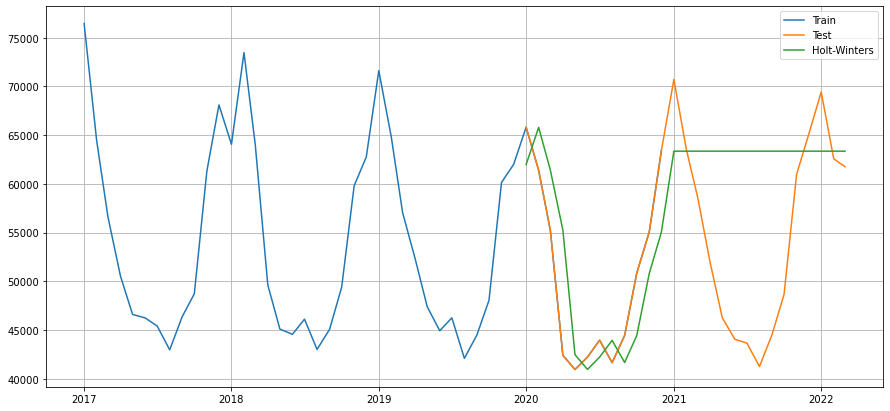

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


train, test = timeSeries[:'2020'], timeSeries['2020':]
model = ExponentialSmoothing(train, seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(15, 7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc="upper right")
plt.grid(True)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

print("Unsupervised - without missing values ")
print('Holt-Winters')
print("----------------")

MAE = mean_absolute_error(test, pred)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(test, pred)
print('MSE : {}'.format(round(MSE, 2)))


RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)


R2_SCORE=r2_score(test, pred)
print('R2_SCORE  : %f' % R2_SCORE)

### ARIMA using sklearn (timeseries values)

In [128]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

import warnings
warnings.filterwarnings("ignore")


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(timeSeries,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1529.4529986768473
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:36979.12674710643
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:974.9172940291796
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:728.6171044130301
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1003.464506609924
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:983.965315406852
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:740.2776908932278
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:721.8502997668725
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1463.4127020989029
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1168.1496956151823
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:946.5001550405634
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:704.241653940591
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1283.0525892810222
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1165.095142007383
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4309      0.332     -1.299      0.194      -1.081       0.219
ma.L1         -0.0720      0.330     -0.218      0.827      -0.719       0.575
ar.S.L12      -0.6702      0.095     -7.045      0.000      -0.857      -0.484
sigma2      6.044e+06   1.62e+06      3.731      0.000    2.87e+06    9.22e+06


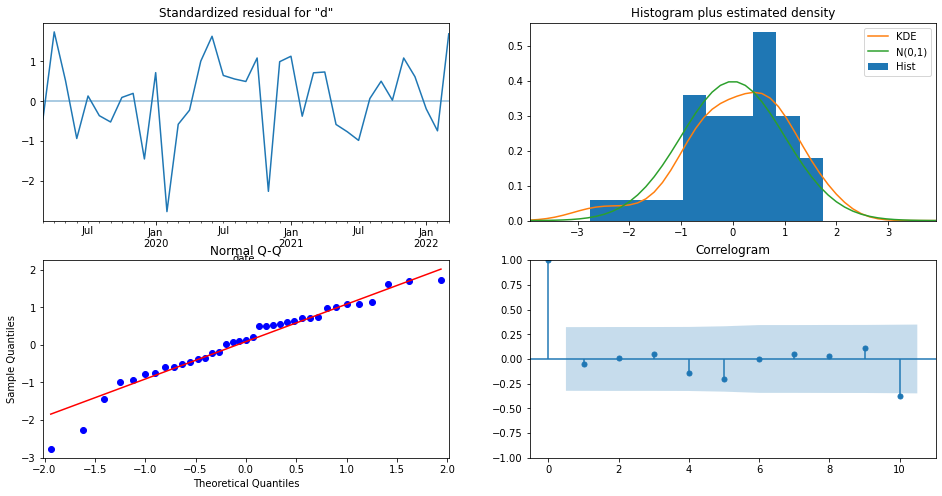

In [129]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(timeSeries,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
#print(results.summary())
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

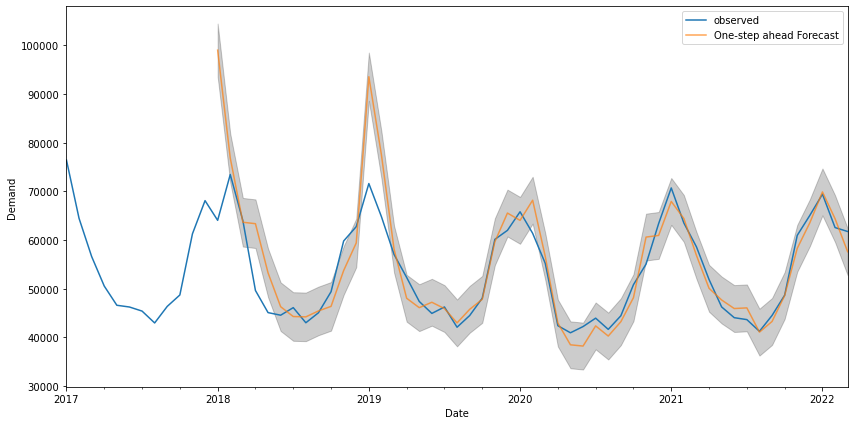

Unsupervised
ARIMA(1, 1, 1)x(0, 1, 1, 12)12
---------------------------------
MAE : 3638.73
MSE : 47522931.62
RMSE  : 6893.687810
R2_SCORE  : 0.486274


In [130]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = timeSeries['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()

from math import sqrt

predicted = pred.predicted_mean
expected = timeSeries['2018-01-01':]
print("Unsupervised")
print('ARIMA(1, 1, 1)x(0, 1, 1, 12)12')
print("---------------------------------")

MAE = mean_absolute_error(expected, predicted)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(expected, predicted)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(expected, predicted)
print('R2_SCORE  : %f' % R2_SCORE)

#  Supervised Learning 

### 7.3.2 Augmented Dickey Fuller Test - to check Stationarity
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [131]:
demand_series_st = timeSeries

In [132]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = demand_series_st
X = series.values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.526439
p-value: 0.520394
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597


### KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend,

or is non-stationary due to a unit root.

In [133]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss

#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value

    print (kpss_output)
    

kpss_test(demand_series_st)

Results of KPSS Test:
Test Statistic            0.260318
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [134]:
# Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary
demand_series_st.head()

date_
2017-01-01    76451.875000
2017-02-01    64459.821429
2017-03-01    56607.774194
2017-04-01    50537.400000
2017-05-01    46589.225806
Freq: MS, Name: demand [MW], dtype: float64

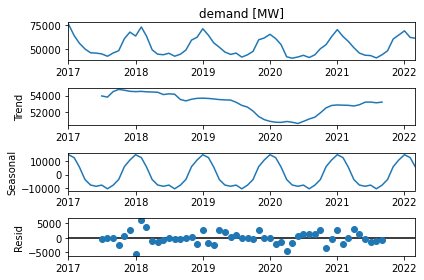

In [135]:
# to eliminate seasonality differenciating twice
demand_series_st = timeSeries - timeSeries.shift(2)
demand_series_st=demand_series_st.dropna()

decomposition = sm.tsa.seasonal_decompose(timeSeries, model='additive')
fig = decomposition.plot()
plt.show()

In [136]:
timeSeries = demand_series_st

###  ARIMA using sklearn ( without missing values)

In [137]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

import warnings
warnings.filterwarnings("ignore")


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(timeSeries_filled,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1529.4529986768473
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:36979.12674710643
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:974.9172940291796
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:728.6171044130301
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1003.464506609924
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:983.965315406852
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:740.2776908932278
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:721.8502997668725
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1463.4127020989029
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1168.1496956151823
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:946.5001550405634
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:704.241653940591
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1283.0525892810222
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1165.095142007383
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2178      0.110      1.985      0.047       0.003       0.433
ma.L1         -0.9998      0.152     -6.584      0.000      -1.297      -0.702
ar.S.L12      -0.3314      0.203     -1.636      0.102      -0.728       0.066
ma.S.L12      -0.4688      0.298     -1.572      0.116      -1.053       0.116
sigma2      1.932e+07   7.86e-09   2.46e+15      0.000    1.93e+07    1.93e+07


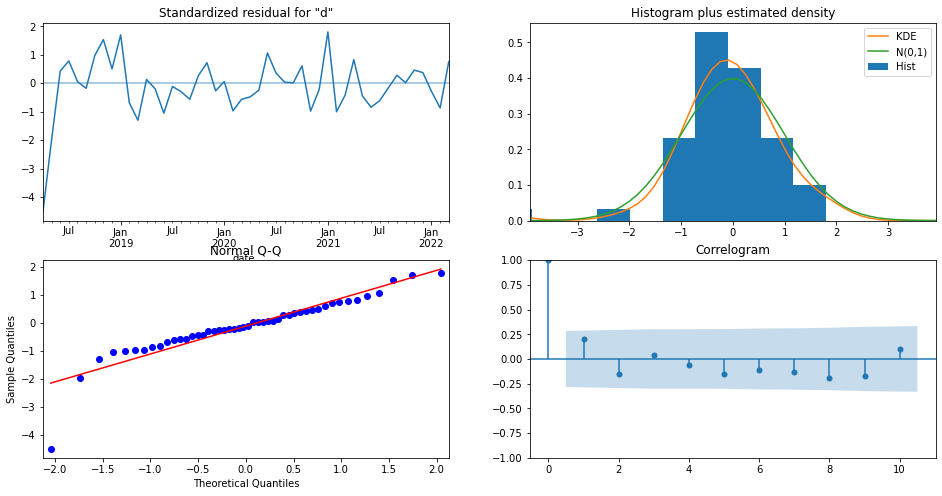

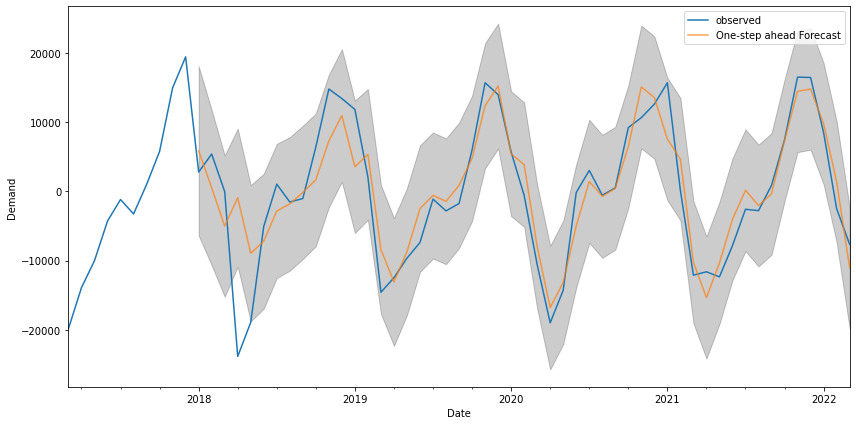

Supervised Learning
ARIMA(2, 0, 2)x(0, 0, 3, 12)12 
---------------------------------
MAE : 3306.25
MSE : 23661942.28
RMSE  : 4864.354251
R2_SCORE  : 0.765355


In [139]:
# '2017-03-01 00:00:00'
# '2022-03-08 22:00:00'
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(timeSeries,
                                order=(1, 1, 1),
                                seasonal_order=(1,1,1, 12))
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = timeSeries['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()

from math import sqrt

predicted = pred.predicted_mean
expected = timeSeries['2018-01-01':]

print("Supervised Learning")
print('ARIMA(2, 0, 2)x(0, 0, 3, 12)12 ')
print("---------------------------------")

MAE = mean_absolute_error(expected, predicted)
print('MAE : {}'.format(round(MAE, 2)))

MSE = mean_squared_error(expected, predicted)
print('MSE : {}'.format(round(MSE, 2)))

RMSE = sqrt(MSE)
print('RMSE  : %f' % RMSE)

R2_SCORE=r2_score(expected, predicted)
print('R2_SCORE  : %f' % R2_SCORE)

# Accuracy of different Algorithms: 

## 8.2 Regression Analysis 

### Multiple Linear Regression
------------------------------

MAE : 0.54

MSE : 0.45

RMSE  : 0.667367

R2_SCORE  : 0.557940
    
### Support Vector Regressor
------------------------------
Accuracy : 0.9021214271293617

MAE : 0.25

MSE : 0.1

RMSE  : 0.314027

R2_SCORE  : 0.902121

    
### K Neighbors Regressor
------------------------------
Accuracy : 0.9368616346234755

MAE : 0.27

MSE : 0.12

RMSE  : 0.342754

R2_SCORE  : 0.883395

KNeighborsRegressor
    

### Multi Layer Perceptron Model
------------------------------
Accuracy : 0.897587747928458

MAE : 0.25

MSE : 0.1

RMSE  : 0.321218

R2_SCORE  : 0.897588

## 8.1 Time-Series Analysis (SK Learn)

### Unsupervised  - Holt-Winters
------------------------------------------

MAE : 7556.53

MSE : 102168691.71

RMSE  : 10107.852972

R2_SCORE  : -0.077558

### Unsupervised  - ARIMA(1, 1, 1)x(0, 1, 1, 12)12
-------------------------------------------------------

MAE : 3638.73

MSE : 47522931.62

RMSE  : 6893.687810

R2_SCORE  : 0.486274

    
### Supervised Learning- ARIMA(2, 0, 2)x(0, 0, 3, 12)12 
---------------------------------
MAE : 3306.25

MSE : 23661942.28

RMSE  : 4864.354251

R2_SCORE  : 0.765355
